# <center><font color="navy">Classification of Alzheimer's Disease Stage Diagnosis:<br />A Benchmark Analysis of Convolutional Neural Network (CNN) Application Utilizing MRI Images</font></center>



# Read the data in, and conducted an exploratory data analysis
### First, we will set up this notebook so that it will display multiple outputs for each cell if needed, as well as load the necessary libraries.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
import pandas as pd

InteractiveShell.ast_node_interactivity = "all"

#####################################
#
#   Set Screen Attributes
#
#####################################
# set cell width
display(HTML("<style>.container { width:100% !important; }</style>"))

# set cell output window height
display(HTML("<style>div.output_scroll { height: 160em;} </style>"))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import shutil
import os
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#pip install opencv-python-headless

In [ ]:
#pip install opencv-python

In [5]:
import numpy as np
import cv2

In [ ]:
#pip install tensorflow

In [6]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.2 MB/s eta 0:00:00


In [7]:
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras_tuner as kt
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import InceptionV3, VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input

## <b>Load the data:

### README INFO:

---
dataset_info:
  features:
  - name: image
    dtype: image
  - name: label
    dtype:
      class_label:
        names:
          '0': Mild_Demented
          '1': Moderate_Demented
          '2': Non_Demented
          '3': Very_Mild_Demented
  splits:
  - name: train
    num_bytes: 22560791.2
    num_examples: 5120
  - name: test
    num_bytes: 5637447.08
    num_examples: 1280
  download_size: 28289848
  dataset_size: 28198238.28
license: apache-2.0
task_categories:
- image-classification
language:
- en
tags:
- medical
pretty_name: Alzheimer_MRI Disease Classification Dataset
size_categories:
- 1K<n<10K
---
## Alzheimer_MRI Disease Classification Dataset

The Falah/Alzheimer_MRI Disease Classification dataset is a valuable resource for researchers and health medicine applications. This dataset focuses on the classification of Alzheimer's disease based on MRI scans. The dataset consists of brain MRI images labeled into four categories:

- '0': Mild_Demented
- '1': Moderate_Demented
- '2': Non_Demented
- '3': Very_Mild_Demented

### Dataset Information

- Train split:
  - Name: train
  - Number of bytes: 22,560,791.2
  - Number of examples: 5,120

- Test split:
  - Name: test
  - Number of bytes: 5,637,447.08
  - Number of examples: 1,280

- Download size: 28,289,848 bytes
- Dataset size: 28,198,238.28 bytes

### Citation

If you use this dataset in your research or health medicine applications, we kindly request that you cite the following publication:
```
@dataset{alzheimer_mri_dataset,
  author = {Falah.G.Salieh},
  title = {Alzheimer MRI Dataset},
  year = {2023},
  publisher = {Hugging Face},
  version = {1.0},
  url = {https://huggingface.co/datasets/Falah/Alzheimer_MRI}
}
```


### Usage Example

Here's an example of how to load the dataset using the Hugging Face library:

```python
from datasets import load_dataset

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='train')

# Print the number of examples and the first few samples
print("Number of examples:", len(dataset))
print("Sample data:")
for example in dataset[:5]:
    print(example)
```

In [ ]:
def disease_label_from_category(category):
    labels = {0: "Mild_Demented", 1: "Moderate_Demented", 2: "Non_Demented", 3: "Very_Mild_Demented"}
    return labels.get(category, "Unknown")

In [ ]:
os.getcwd()

#set working Directory
#os.chdir('/Users/mhurt/Documents/MSDS458/Course Project')

'C:\\Users\\mhurt\\Documents\\MSDS458\\Course Project'

In [ ]:
#pip install shutil

In [ ]:
# Move kaggle.json to the right location
#shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/"))

# Set proper permissions
#os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 600)

In [ ]:
!kaggle datasets download -d borhanitrash/alzheimer-mri-disease-classification-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/borhanitrash/alzheimer-mri-disease-classification-dataset
License(s): apache-2.0




  0%|          | 0.00/26.0M [00:00<?, ?B/s]
  4%|3         | 1.00M/26.0M [00:00<00:04, 5.44MB/s]
 15%|#5        | 4.00M/26.0M [00:00<00:01, 14.5MB/s]
 27%|##6       | 7.00M/26.0M [00:00<00:01, 19.4MB/s]
 39%|###8      | 10.0M/26.0M [00:00<00:00, 20.8MB/s]
 54%|#####3    | 14.0M/26.0M [00:00<00:00, 22.4MB/s]
 69%|######9   | 18.0M/26.0M [00:00<00:00, 25.0MB/s]
 81%|########  | 21.0M/26.0M [00:01<00:00, 22.3MB/s]
 92%|#########2| 24.0M/26.0M [00:01<00:00, 22.5MB/s]
100%|##########| 26.0M/26.0M [00:01<00:00, 21.5MB/s]


In [ ]:
# Define source and destination paths
testdata_path = "C:/Users/mhurt/Documents/MSDS458/Course Project/Alzheimer MRI Disease Classification Dataset/Data/test-00000-of-00001-44110b9df98c5585.parquet"
traindata_path = "C:/Users/mhurt/Documents/MSDS458/Course Project/Alzheimer MRI Disease Classification Dataset/Data/train-00000-of-00001-c08a401c53fe5312.parquet"
destination_path = os.getcwd()

# Move the file
shutil.move(testdata_path, destination_path)
shutil.move(traindata_path, destination_path)


'C:\\Users\\mhurt\\Documents\\MSDS458\\Course Project\\test-00000-of-00001-44110b9df98c5585.parquet'

'C:\\Users\\mhurt\\Documents\\MSDS458\\Course Project\\train-00000-of-00001-c08a401c53fe5312.parquet'

In [8]:
uploaded = files.upload()

Saving test-00000-of-00001-44110b9df98c5585.parquet to test-00000-of-00001-44110b9df98c5585.parquet
Saving train-00000-of-00001-c08a401c53fe5312.parquet to train-00000-of-00001-c08a401c53fe5312.parquet


In [9]:
test_data = "test-00000-of-00001-44110b9df98c5585.parquet"
train_data = "train-00000-of-00001-c08a401c53fe5312.parquet"

test_data = pd.read_parquet(test_data)
train_data = pd.read_parquet(train_data)


test_data.head()  # Display the first few rows

train_data.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0


,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2


# <b><center><br /><br />Investigation of Data, Missingness, and Outliers in Testing and Training Data

## <b><br /><br />Test data:<br /><br />

In [ ]:
# find null counts, percentage of null values, and column type
null_count = test_data.isnull().sum()
null_percentage = test_data.isnull().sum() * 100 / len(test_data)
column_type = test_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


In [10]:
def dict_to_image(image_dict):
    if isinstance(image_dict, dict) and 'bytes' in image_dict:
        byte_string = image_dict['bytes']
        nparr = np.frombuffer(byte_string, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)
        return img
    else:
        raise TypeError(f"Expected dictionary with 'bytes' key, got {type(image_dict)}")

In [11]:
test_data['img_arr'] = test_data['image'].apply(dict_to_image)
test_data.drop("image", axis=1, inplace=True)
test_data.head()

train_data['img_arr'] = train_data['image'].apply(dict_to_image)
train_data.drop("image", axis=1, inplace=True)
train_data

,label,img_arr
0,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


,label,img_arr
0,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...
5115,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5116,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5117,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5118,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [12]:
# Check the type of the 'label' column
print(f"Original type of 'label' column: {test_data['label'].dtype}")

# Convert the 'label' column to numerical values
test_data['label'] = pd.to_numeric(test_data['label'], errors='coerce')  # Convert to numeric, 'coerce' will turn errors into NaN

# Check the type again after conversion
print(f"New type of 'label' column: {test_data['label'].dtype}")

# Optionally, check the updated DataFrame
print(test_data)

Original type of 'label' column: int64
New type of 'label' column: int64
      label                                            img_arr
0         3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1         0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2         2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3         3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4         0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
...     ...                                                ...
1275      3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1276      2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1277      3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1278      2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1279      3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

[1280 rows x 2 columns]


Text(0.5, 1.0, 'Non_Demented')

Text(0.5, 1.0, 'Very_Mild_Demented')

Text(0.5, 1.0, 'Mild_Demented')

Text(0.5, 1.0, 'Very_Mild_Demented')

Text(0.5, 1.0, 'Very_Mild_Demented')

Text(0.5, 1.0, 'Non_Demented')

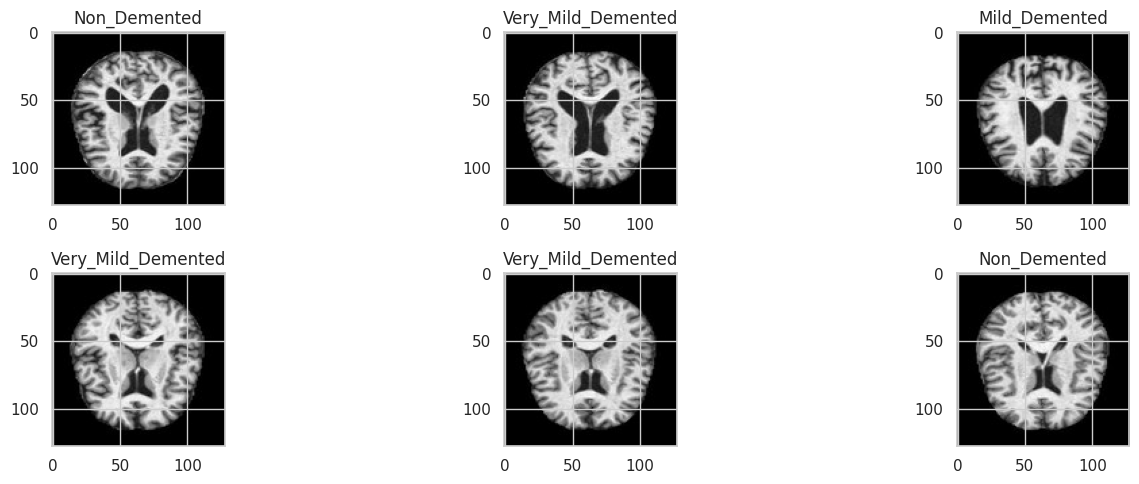

In [ ]:
# Check we can actually render the image and that it looks reasonable
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
axs = ax.flatten()

for axes in axs:
    rand = np.random.randint(0, len(test_data))
    axes.imshow(test_data.iloc[rand]['img_arr'], cmap="gray")
    axes.set_title(disease_label_from_category(test_data.iloc[rand]['label']))
plt.tight_layout()
plt.show()

In [ ]:
# Map the numeric labels to disease categories
#test_data['label'] = test_data['label'].map(disease_label_from_category)

# Count the occurrences of each label
test_label_counts = test_data['label'].value_counts().sort_index()

In [ ]:
# Sort the test_label_counts by value in increasing order
test_label_counts = test_label_counts.sort_values()

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, "Alzheimer's Disease Stage Labels")

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Table 2. Frequency of Test Data Labels')

<ipython-input-25-b672e87e339d>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([custom_labels.get(label, label) for label in test_label_counts.index], ha='right', fontsize=12)


[Text(0, 0, 'Moderate Dementia'),
 Text(1, 0, 'Mild Dementia'),
 Text(2, 0, 'Very Mild Dementia'),
 Text(3, 0, 'No Dementia')]

<ipython-input-25-b672e87e339d>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


[Text(0, 0.0, '0'),
 Text(0, 100.0, '100'),
 Text(0, 200.0, '200'),
 Text(0, 300.0, '300'),
 Text(0, 400.0, '400'),
 Text(0, 500.0, '500'),
 Text(0, 600.0, '600'),
 Text(0, 700.0, '700')]

Text(0.0, 15.1, '15')

Text(1.0, 172.1, '172')

Text(2.0, 459.1, '459')

Text(3.0, 634.1, '634')

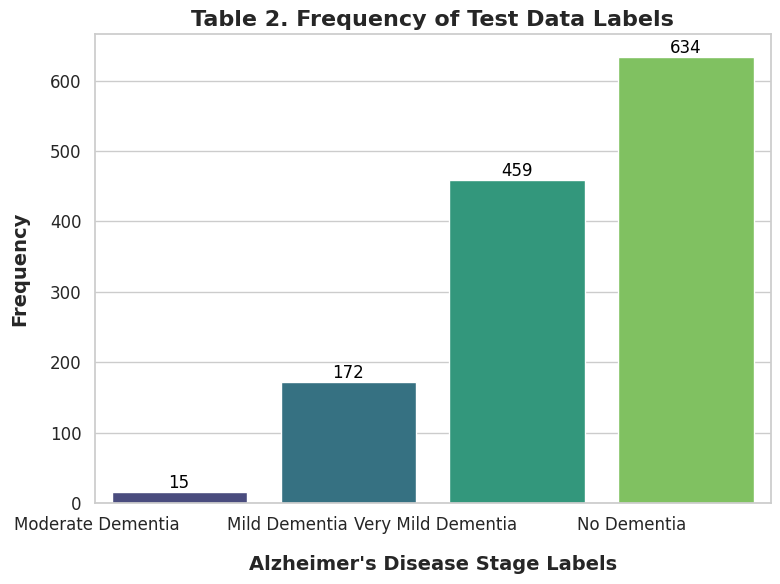

In [ ]:
# Set up the aesthetics using Seaborn
sns.set(style="whitegrid")  # White background with gridlines

# Create a dictionary for custom label names
custom_labels = {
    'Mild_Demented': "Mild Dementia",
    'Moderate_Demented': "Moderate Dementia",
    'Non_Demented': "No Dementia",
    'Very_Mild_Demented': "Very Mild Dementia"
}

# Create the bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = sns.barplot(x=test_label_counts.index, y=test_label_counts.values, palette='viridis', legend=False, hue=test_label_counts.index)

# Set labels and title
ax.set_xlabel("Alzheimer's Disease Stage Labels", fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel("Frequency", fontsize=14, fontweight='bold', labelpad=15)
ax.set_title("Table 2. Frequency of Test Data Labels", fontsize=16, fontweight='bold')

# Customize the tick marks and labels
# Replace the x-tick labels with custom labels
ax.set_xticklabels([custom_labels.get(label, label) for label in test_label_counts.index], ha='right', fontsize=12)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Add value annotations (frequency) on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,  # Positioning the text on top of the bar
            f'{height:.0f}',  # Value format
            ha='center', va='bottom', fontsize=12, color='black')

# Display the plot
plt.tight_layout()
#plt.savefig('test_data_label_freqs.png', format='png', dpi=300)  # Save with 300 DPI for better resolution
plt.show()

## <b><br /><br />Train data:<br /><br />

In [ ]:
# find null counts, percentage of null values, and column type
null_count = train_data.isnull().sum()
null_percentage = train_data.isnull().sum() * 100 / len(train_data)
column_type = train_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


In [13]:
# Check the type of the 'label' column
print(f"Original type of 'label' column: {train_data['label'].dtype}")

# Convert the 'label' column to numerical values
test_data['label'] = pd.to_numeric(train_data['label'], errors='coerce')  # Convert to numeric, 'coerce' will turn errors into NaN

# Check the type again after conversion
print(f"New type of 'label' column: {train_data['label'].dtype}")

# Optionally, check the updated DataFrame
print(train_data)

Original type of 'label' column: int64
New type of 'label' column: int64
      label                                            img_arr
0         2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1         0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2         3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3         3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4         2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
...     ...                                                ...
5115      3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
5116      3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
5117      3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
5118      0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
5119      2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

[5120 rows x 2 columns]


Text(0.5, 1.0, 'Non_Demented')

Text(0.5, 1.0, 'Mild_Demented')

Text(0.5, 1.0, 'Non_Demented')

Text(0.5, 1.0, 'Mild_Demented')

Text(0.5, 1.0, 'Non_Demented')

Text(0.5, 1.0, 'Very_Mild_Demented')

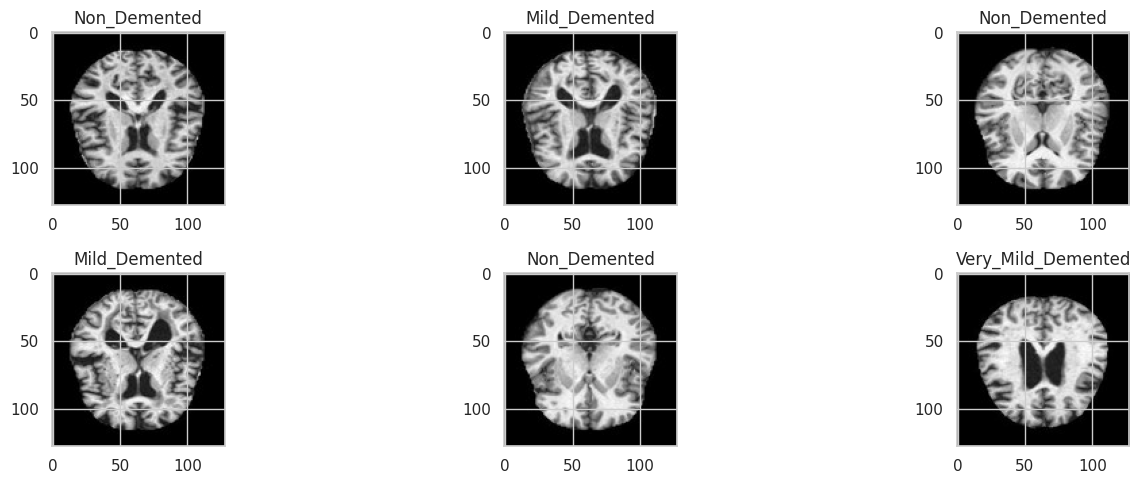

In [ ]:
# Check we can actually render the image and that it looks reasonable
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
axs = ax.flatten()

for axes in axs:
    rand = np.random.randint(0, len(train_data))
    axes.imshow(train_data.iloc[rand]['img_arr'], cmap="gray")
    axes.set_title(disease_label_from_category(train_data.iloc[rand]['label']))
plt.tight_layout()
plt.show()

In [ ]:
# Map the numeric labels to disease categories
#train_data['label'] = train_data['label'].map(disease_label_from_category)

# Count the occurrences of each label
train_label_counts = train_data['label'].value_counts().sort_index()

In [ ]:
# Sort the test_label_counts by value in increasing order
train_label_counts = train_label_counts.sort_values()

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, "Alzheimer's Disease Stage Labels")

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Table 1. Frequency of Train Data Labels')

<ipython-input-30-90c197e70281>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([custom_labels.get(label, label) for label in train_label_counts.index], ha='right', fontsize=12)


[Text(0, 0, 'Moderate Dementia'),
 Text(1, 0, 'Mild Dementia'),
 Text(2, 0, 'Very Mild Dementia'),
 Text(3, 0, 'No Dementia')]

<ipython-input-30-90c197e70281>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


[Text(0, 0.0, '0'),
 Text(0, 500.0, '500'),
 Text(0, 1000.0, '1000'),
 Text(0, 1500.0, '1500'),
 Text(0, 2000.0, '2000'),
 Text(0, 2500.0, '2500'),
 Text(0, 3000.0, '3000')]

Text(0.0, 49.1, '49')

Text(1.0, 724.1, '724')

Text(2.0, 1781.1, '1781')

Text(3.0, 2566.1, '2566')

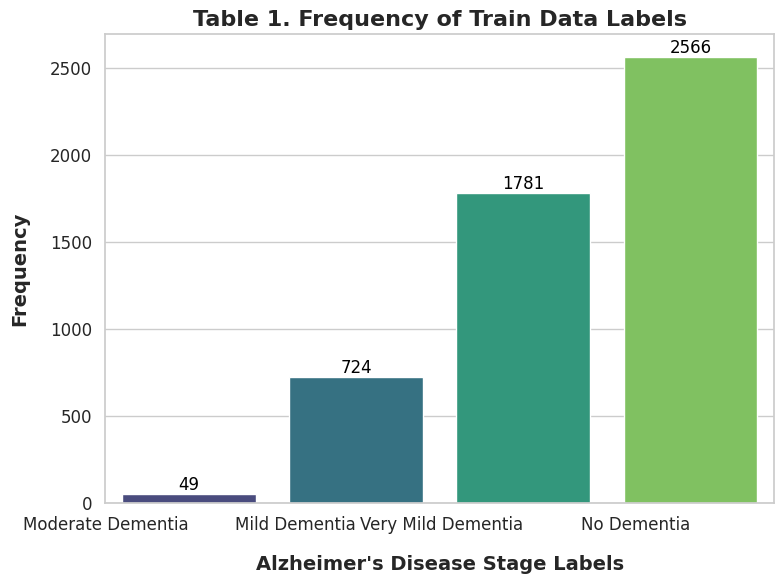

In [ ]:
# Set up the aesthetics using Seaborn
sns.set(style="whitegrid")  # White background with gridlines

# Create the bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = sns.barplot(x=train_label_counts.index, y=train_label_counts.values, palette='viridis', legend=False, hue=train_label_counts.index)

# Set labels and title
ax.set_xlabel("Alzheimer's Disease Stage Labels", fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel("Frequency", fontsize=14, fontweight='bold', labelpad=15)
ax.set_title("Table 1. Frequency of Train Data Labels", fontsize=16, fontweight='bold')

# Customize the tick marks and labels
# Replace the x-tick labels with custom labels
ax.set_xticklabels([custom_labels.get(label, label) for label in train_label_counts.index], ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Add value annotations (frequency) on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,  # Positioning the text on top of the bar
            f'{height:.0f}',  # Value format
            ha='center', va='bottom', fontsize=12, color='black')

# Display the plot
plt.tight_layout()
#plt.savefig('train_data_label_freqs.png', format='png', dpi=300)  # Save with 300 DPI for better resolution
plt.show()

<br /><br/>
# <b><center><font color="navy">Experiment 1a: <br /> Building a Simple CNN for MRI Image Classification: A Foundational Approach
<br /><br />

## Prepare the data for CNN

In [ ]:
# Access the first image: TEST DATA
image_array = test_data.iloc[0]['img_arr']

# Check the number of dimensions in the image array
if len(image_array.shape) == 2:
    # Grayscale image (height, width)
    height, width = image_array.shape
elif len(image_array.shape) == 3:
    # RGB image (height, width, channels)
    height, width, channels = image_array.shape
    print(f"Channels: {channels}")  # This will print the number of color channels (typically 3 for RGB)
else:
    raise ValueError("Unexpected image shape")

print(f"Image Size: {height}x{width} pixels")

Image Size: 128x128 pixels


In [ ]:
# Access the first image: TRAIN DATA
image_array = train_data.iloc[0]['img_arr']

# Check the number of dimensions in the image array
if len(image_array.shape) == 2:
    # Grayscale image (height, width)
    height, width = image_array.shape
elif len(image_array.shape) == 3:
    # RGB image (height, width, channels)
    height, width, channels = image_array.shape
    print(f"Channels: {channels}")  # This will print the number of color channels (typically 3 for RGB)
else:
    raise ValueError("Unexpected image shape")

print(f"Image Size: {height}x{width} pixels and {channels} channels.")

Image Size: 128x128 pixels and 3 channels.


In [14]:
X_train = np.stack(train_data['img_arr'].values)  # Convert list of arrays into a single 4D NumPy array
X_test = np.stack(test_data['img_arr'].values)  # Convert list of arrays into a single 4D NumPy array

# Ensure the shape is (num_samples, 128, 128, 1) for grayscale images
if X_train.ndim == 3:
    X_train = np.expand_dims(X_train, axis=-1)
if X_test.ndim == 3:
    X_test = np.expand_dims(X_test, axis=-1)

# Normalize images to range [0,1] if necessary
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [15]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_data['label'])  # Convert labels to integers
y_test_encoded = label_encoder.fit_transform(test_data['label'])  # Convert labels to integers

# Check the unique mapping (useful for debugging)
print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

# Convert to one-hot encoding
num_classes = len(np.unique(y_train_encoded))
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

{0: 0, 1: 1, 2: 2, 3: 3}


In [16]:
# Split training data into training and validation sets (80% train, 30% val)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.3, random_state=42, stratify=y_train_encoded)

# Print final shapes
print(f"Training set: {X_train_final.shape}, {y_train_final.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test_one_hot.shape}")

Training set: (3584, 128, 128, 1), (3584, 4)
Validation set: (1536, 128, 128, 1), (1536, 4)
Test set: (1280, 128, 128, 1), (1280, 4)


## Set Initial Parameters
### <b>Final Structure:
<ol><li><b>Training Set: X_train_final, y_train_final</li>
<li><b>Validation Set: X_val, y_val</li>
<li><b>Test Set: X_test, y_test_one_hot</li> <br />

In [ ]:
# Clear session to avoid memory issues
K.clear_session()

In [17]:
metrics=['accuracy', AUC(), Precision(), Recall()]

In [18]:
# Define the callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,  # Stop training if val_loss does not improve for 5 consecutive epochs
    restore_best_weights=True  # Restore the best model weights after stopping
    )

model_checkpoint = ModelCheckpoint(
    'best_model.keras',  # Save the best model
    monitor='val_accuracy',  # Track validation accuracy
    save_best_only=True,  # Only save models that improve on validation accuracy
    mode='max',  # Higher validation accuracy is better
    verbose=1
    )

In [ ]:
model = Sequential([
    # Input Layer
    Conv2D(32, (3,3), activation='leaky_relu', padding='same', input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # Second Conv Block
    Conv2D(64, (3,3), activation='leaky_relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='leaky_relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # Third Conv Block
    Conv2D(128, (3,3), activation='leaky_relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='leaky_relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # Fourth Conv Block
    Conv2D(256, (3,3), activation='leaky_relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='leaky_relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # Flatten layer
    Flatten(),

    # Fully Connected Layers
    Dense(512, activation='leaky_relu'),
    Dropout(0.3),
    Dense(256, activation='leaky_relu'),
    Dropout(0.3),

    # Output Layer
    Dense(4, activation='softmax')  # 4 classes
])

In [19]:
#CNN 1 at learning_rate=0.0001: 10 epochs, 64 batch size, dropout layers set  to 0.5 w/ relu. accuracy was 78% train, 52% test
#CNN 8 at learning_rate=0.0001: 10 epochs, 128 batch size, dropout layers set  to 0.5 w/ leaky relu . accuracy was 87% train, 43% test
#CNN 7 at learning_rate=0.0001: 10 epochs, 64 batch size, dropout layers set  to 0.5 w/ leaky relu. accuracy was 92% train, 69% test
#CNN 9 at learning_rate=0.0001: 10 epochs, 128 batch size, dropout layers set  to 0.3 w/ leaky relu . accuracy was 98% train, 58% test
#CNN 5 at learning_rate 0.0001: 10 epochs, 64 batch size, dropout layers set to 0.3, w/ leaky_relu. accuracy 98% train, 68% test
optimizer = Adam(learning_rate=0.0001)

#CNN 4 (need to redo) at learning_rate=0.001: 10 epochs, 64 batch size, dropout layers set  to 0.5 w/ relu. accuracy was % train, % test
#CNN 6 at learning_rate 0.001: 10 epochs, 64 batch size, dropout layers set to 0.3 w/ leaky_relu. accuracy 54% train, 19% test
#optimizer = Adam(learning_rate=0.001)

#CNN 2 (need to redo) at learning_rate=0.01: 10 epochs, 64 batch size, dropout layers set  to 0.5 and relu. accuracy was % train, % test#
#optimizer = Adam(learning_rate=0.01)

#CNN 10 at learning rate 0.01 and momentum is 0.0: 10 epochs, 64 batch size, dropout layers set to 0.3 w/ leaky relu. accuracy was 52% train, 36% test
#CNN 11 at learning rate 0.01, momentum = 0.9: NO
#CNN 12 at learning rate 0.1, momentum = 0.9: NO
#CNN 13 at learning rate 0.005, momentum = 0.95: No
#CNN 14 at learning rate 0.001, momentum = 0.5: No
#CNN 15 at learning rate 0.1, momentum = 0.6:
#CNN 16 at learning rate 0.001, momentum = 0.99:
#CNN 17 at learning rate 0.2, momentum = 0.3:
#optimizer = SGD(learning_rate=0.001, momentum = 0.5)

In [ ]:
# Compile model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=metrics)

# Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │              

 Total params: 9,037,380 (34.47 MB)

 Trainable params: 9,033,476 (34.46 MB)

 Non-trainable params: 3,904 (15.25 KB)

## <center><font color="navy"> First set of ablation and optimization experiments: relu activation function

### CNN 1 <br />First attempt at learning_rate=0.0001: 10 epochs, 64 batch size, dropout layers set  to 0.5... the accuracy was 78%, 52% test

In [ ]:
cnn_1 = model.fit(
                X_train_final, y_train_final,  # Training data
                validation_data=(X_val, y_val),  # Validation data
                epochs=10,  # Number of training cycles
                batch_size=64,  # Adjust batch size based on available memory
                verbose=1  # Shows progress during training
)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.4047 - auc_2: 0.6644 - loss: 2.7032 - precision: 0.4122 - recall: 0.3695 - val_accuracy: 0.1413 - val_auc_2: 0.5378 - val_loss: 1.5159 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.5054 - auc_2: 0.7881 - loss: 1.0812 - precision: 0.5881 - recall: 0.3437 - val_accuracy: 0.5013 - val_auc_2: 0.7156 - val_loss: 1.2095 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5224 - auc_2: 0.8028 - loss: 1.0443 - precision: 0.6167 - recall: 0.3431 - val_accuracy: 0.5013 - val_auc_2: 0.7806 - val_loss: 1.1828 - val_precision: 0.5013 - val_recall: 0.5013
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.5529 - auc_2: 0.8232 - loss: 0.9806 - precision: 0.6469 - recall: 0.3701 - val_accuracy: 0.5013 - val_auc_2: 0.7938 - val_loss: 1.6036 - val_precision: 0.5013 - val_recall: 0.5013
Epoc

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

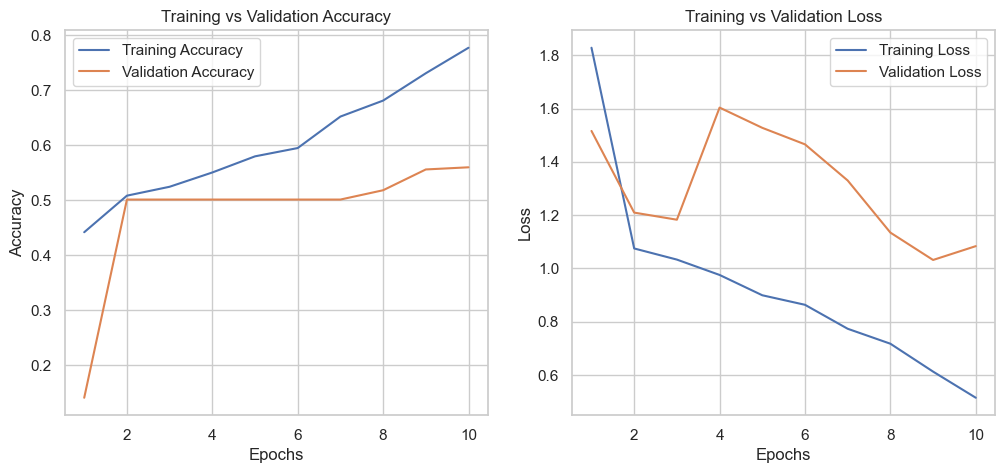

In [ ]:
# Extract training history
epochs = range(1, len(cnn_1.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_1.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_1.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [ ]:
test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - accuracy: 0.5279 - auc_2: 0.8467 - loss: 1.1471 - precision: 0.5499 - recall: 0.5173
Test Accuracy: [1.0936295986175537, 0.5523437261581421, 0.8582560420036316, 0.5723738670349121, 0.5406249761581421]


### CNN 3 <br />Third attempt at learning_rate=0.0001: 10 epochs, 128 batch size, dropout layers set  to 0.5... the accuracy was 48% train, 47% test

In [ ]:
cnn_3 = model.fit(
                X_train_final, y_train_final,  # Training data
                validation_data=(X_val, y_val),  # Validation data
                epochs=10,  # Number of training cycles
                batch_size=128,  # Adjust batch size based on available memory
                verbose=1  # Shows progress during training
)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step - accuracy: 0.4992 - auc_3: 0.7760 - loss: 1.0605 - precision_1: 0.3826 - recall_1: 0.0127 - val_accuracy: 0.5013 - val_auc_3: 0.7802 - val_loss: 1.0366 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.4950 - auc_3: 0.7771 - loss: 1.0490 - precision_1: 0.4683 - recall_1: 0.0249 - val_accuracy: 0.5013 - val_auc_3: 0.7802 - val_loss: 1.0365 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 185s 7s/step - accuracy: 0.4885 - auc_3: 0.7766 - loss: 1.0447 - precision_1: 0.4484 - recall_1: 0.0195 - val_accuracy: 0.5013 - val_auc_3: 0.7802 - val_loss: 1.0365 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 158s 6s/step - accuracy: 0.4827 - auc_3: 0.7734 - loss: 1.0556 - precision_1: 0.4734 - recall_1: 0.0211 - val_accuracy: 0.5013 - val_auc_3: 0.7802 - val_loss: 1.0365 - val_precisi

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

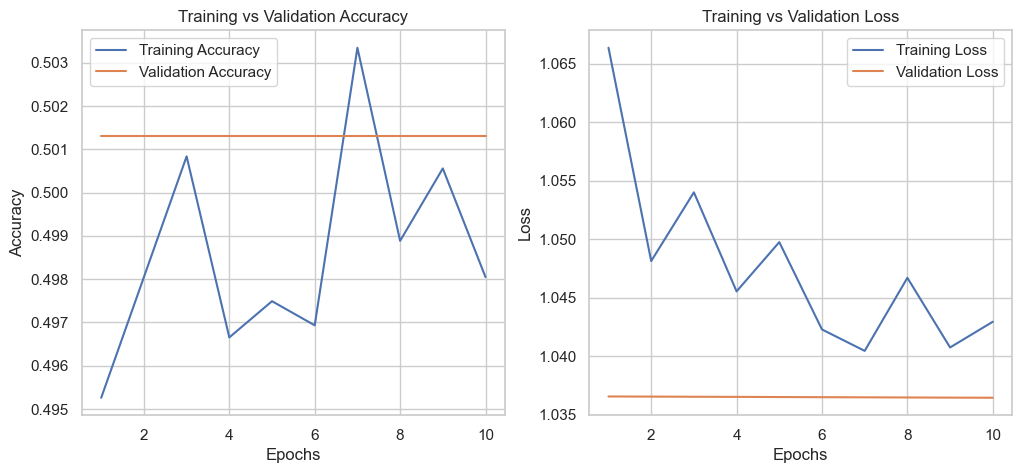

In [ ]:
# Extract training history
epochs = range(1, len(cnn_3.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_3.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_3.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [ ]:
test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.4778 - auc_3: 0.7709 - loss: 1.0514 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Test Accuracy: [1.0381908416748047, 0.49531251192092896, 0.7791666388511658, 0.0, 0.0]


### CNN 4 <br />Fourth attempt at learning_rate=0.001: 10 epochs, 64 batch size, dropout layers set  to 0.5... the accuracy was

In [ ]:
cnn_4 = model.fit(
                X_train_final, y_train_final,  # Training data
                validation_data=(X_val, y_val),  # Validation data
                epochs=10,  # Number of training cycles
                batch_size=64,  # Adjust batch size based on available memory
                verbose=1  # Shows progress during training
)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.4934 - auc_3: 0.7758 - loss: 1.0679 - precision_1: 0.4248 - recall_1: 0.0104 - val_accuracy: 0.5013 - val_auc_3: 0.7802 - val_loss: 1.0363 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.4871 - auc_3: 0.7756 - loss: 1.0596 - precision_1: 0.4899 - recall_1: 0.0306 - val_accuracy: 0.5013 - val_auc_3: 0.7802 - val_loss: 1.0362 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.5023 - auc_3: 0.7845 - loss: 1.0311 - precision_1: 0.5091 - recall_1: 0.0369 - val_accuracy: 0.5013 - val_auc_3: 0.7802 - val_loss: 1.0361 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.4926 - auc_3: 0.7762 - loss: 1.0515 - precision_1: 0.4797 - recall_1: 0.0415 - val_accuracy: 0.5013 - val_auc_3: 0.7802 - val_loss: 1.0360 - val_precisi

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

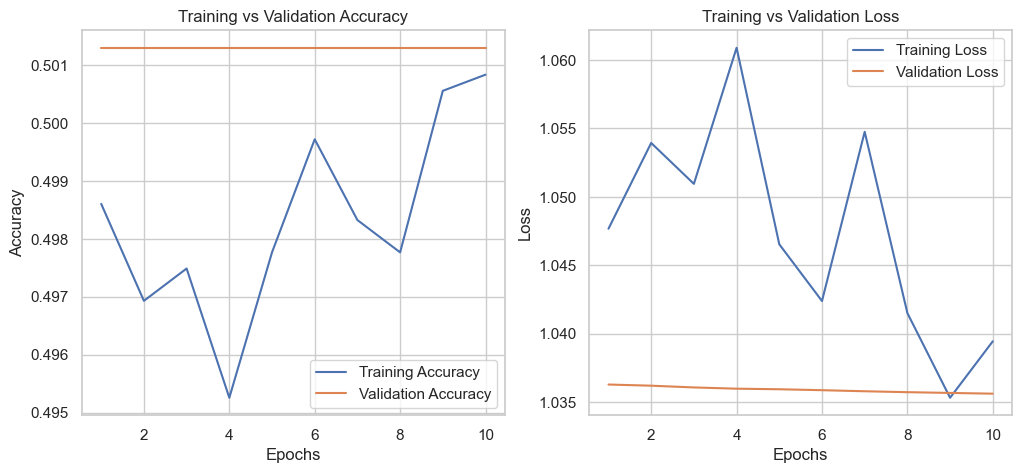

In [ ]:
# Extract training history
epochs = range(1, len(cnn_4.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_4.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_4.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [ ]:
test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 366ms/step - accuracy: 0.4778 - auc_3: 0.7709 - loss: 1.0511 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Test Accuracy: [1.0380051136016846, 0.49531251192092896, 0.7791666984558105, 0.0, 0.0]


### CNN 2 <br />Second attempt at learning_rate=0.01: 10 epochs, 64 batch size, dropout layers set  to 0.5... the accuracy was 50% train, 47% test

In [ ]:
cnn_2 = model.fit(
                X_train_final, y_train_final,  # Training data
                validation_data=(X_val, y_val),  # Validation data
                epochs=10,  # Number of training cycles
                batch_size=64,  # Adjust batch size based on available memory
                verbose=1  # Shows progress during training
)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.3990 - auc_3: 0.6140 - loss: 39.0662 - precision_1: 0.3931 - recall_1: 0.3297 - val_accuracy: 0.3477 - val_auc_3: 0.5651 - val_loss: 251.6621 - val_precision_1: 0.3477 - val_recall_1: 0.3477
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.4768 - auc_3: 0.7538 - loss: 1.2561 - precision_1: 0.4711 - recall_1: 0.0844 - val_accuracy: 0.3327 - val_auc_3: 0.5548 - val_loss: 10.1827 - val_precision_1: 0.3327 - val_recall_1: 0.3327
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.4997 - auc_3: 0.7746 - loss: 1.1115 - precision_1: 0.4730 - recall_1: 0.0415 - val_accuracy: 0.5013 - val_auc_3: 0.7803 - val_loss: 1.0678 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5030 - auc_3: 0.7793 - loss: 1.0657 - precision_1: 0.4548 - recall_1: 0.0210 - val_accuracy: 0.5013 - val_auc_3: 0.7802 - val_loss: 1.0536 - val_precision_1: 0.0000

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

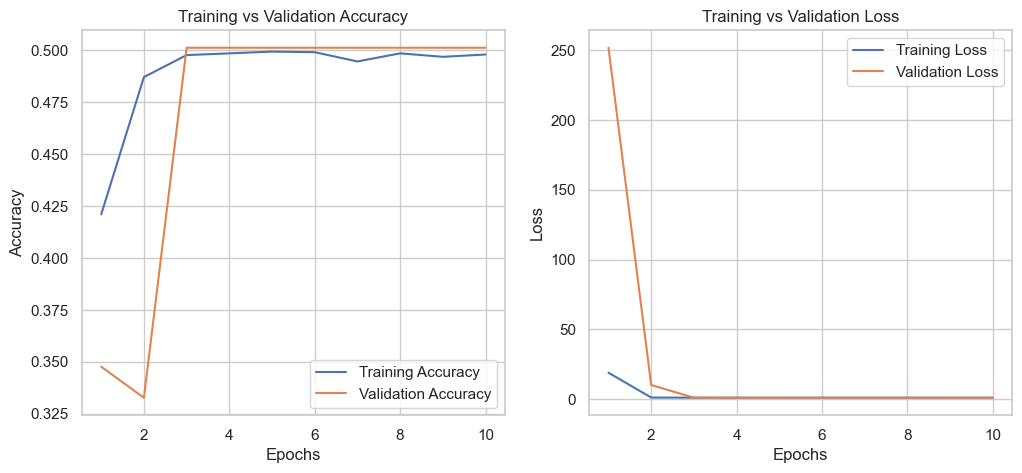

In [ ]:
# Extract training history
epochs = range(1, len(cnn_2.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_2.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_2.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [ ]:
test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.4778 - auc_3: 0.7709 - loss: 1.0515 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Test Accuracy: [1.03822922706604, 0.49531251192092896, 0.7791666984558105, 0.0, 0.0]


## <center><font color="navy"> Major changes to this next set of experiements: 0.3 dropout layers, and leaky relu activation function

### CNN 5a <br />Fifth attempt at learning_rate=0.0001: 10 epochs, 64 batch size, dropout layers set  to 0.3, and leaky relu... the accuracy was 98% train, 68% test

In [ ]:
cnn_5 = model.fit(
                X_train_final, y_train_final,  # Training data
                validation_data=(X_val, y_val),  # Validation data
                epochs=15,  # Number of training cycles
                batch_size=64,  # Adjust batch size based on available memory
                verbose=1,  # Shows progress during training,
                callbacks=[early_stopping, model_checkpoint]

)

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4664 - auc: 0.7362 - loss: 2.2151 - precision: 0.4727 - recall: 0.4282
Epoch 1: val_loss improved from inf to 1.31431, saving model to best_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.4671 - auc: 0.7369 - loss: 2.2028 - precision: 0.4734 - recall: 0.4286 - val_accuracy: 0.3477 - val_auc: 0.7007 - val_loss: 1.3143 - val_precision: 0.3477 - val_recall: 0.3477
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6050 - auc: 0.8601 - loss: 0.9047 - precision: 0.6477 - recall: 0.5317
Epoch 2: val_loss did not improve from 1.31431
56/56 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.6053 - auc: 0.8603 - loss: 0.9039 - precision: 0.6480 - recall: 0.5321 - val_accuracy: 0.3477 - val_auc: 0.7480 - val_loss: 1.5523 - val_precision: 0.3477 - val_recall: 0.3477
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7045 - auc: 0.9176 - loss: 0.6820 - precision: 0.7420 - recall: 0.6454
Epoch 3: v

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

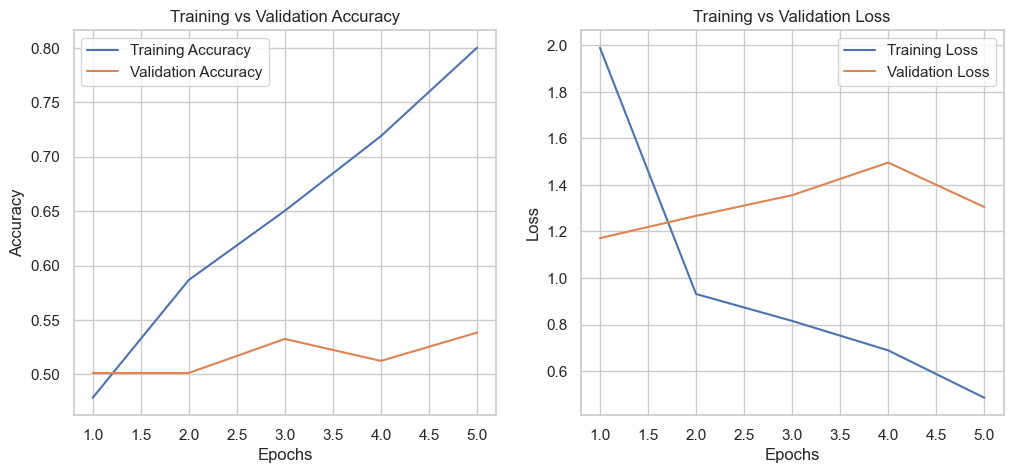

In [ ]:
# Extract training history
epochs = range(1, len(cnn_5.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_5.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_5.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [ ]:
# Load the best saved model
best_model = load_model('best_model.keras')

# Evaluate on test data
test_acc = best_model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

### CNN 5b with 5 conv blocks, 5th layer at 512: NO

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

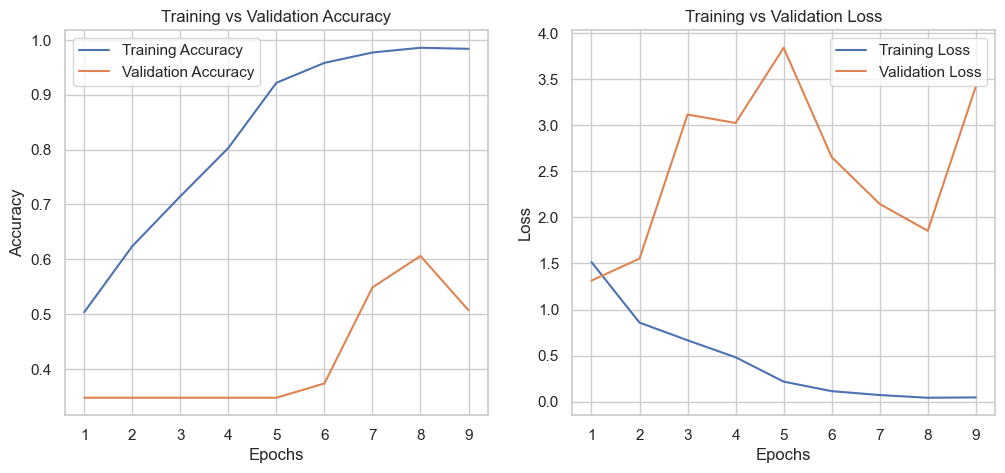

In [ ]:
# Extract training history
epochs = range(1, len(cnn_5.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_5.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_5.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [ ]:
# Load the best saved model
best_model = load_model('best_model.keras')

# Evaluate on test data
test_acc = best_model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 284ms/step - accuracy: 0.3689 - auc: 0.7062 - loss: 1.2966 - precision: 0.3689 - recall: 0.3689
Test Accuracy: [1.298872470855713, 0.35859376192092896, 0.7091361880302429, 0.35859376192092896, 0.35859376192092896]


## <center><font color="navy"> Testing dense layers.

In [ ]:
cnn_52 = model.fit(
                X_train_final, y_train_final,  # Training data
                validation_data=(X_val, y_val),  # Validation data
                epochs=10,  # Number of training cycles
                batch_size=64,  # Adjust batch size based on available memory
                verbose=1,  # Shows progress during training,
                callbacks=[early_stopping, model_checkpoint]

)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4554 - auc: 0.7135 - loss: 3.5253 - precision: 0.4633 - recall: 0.4415
Epoch 1: val_loss improved from inf to 1.27742, saving model to best_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.4561 - auc: 0.7144 - loss: 3.4993 - precision: 0.4640 - recall: 0.4419 - val_accuracy: 0.3477 - val_auc: 0.7109 - val_loss: 1.2774 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5635 - auc: 0.8345 - loss: 1.0429 - precision: 0.5918 - recall: 0.5183
Epoch 2: val_loss did not improve from 1.27742
56/56 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5639 - auc: 0.8347 - loss: 1.0418 - precision: 0.5922 - recall: 0.5186 - val_accuracy: 0.5020 - val_auc: 0.7606 - val_loss: 1.3392 - val_precision: 0.5056 - val_recall: 0.5000
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6390 - auc: 0.8763 - loss: 0.8617 - precision: 0.6634 - recall: 0.5870
Ep

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

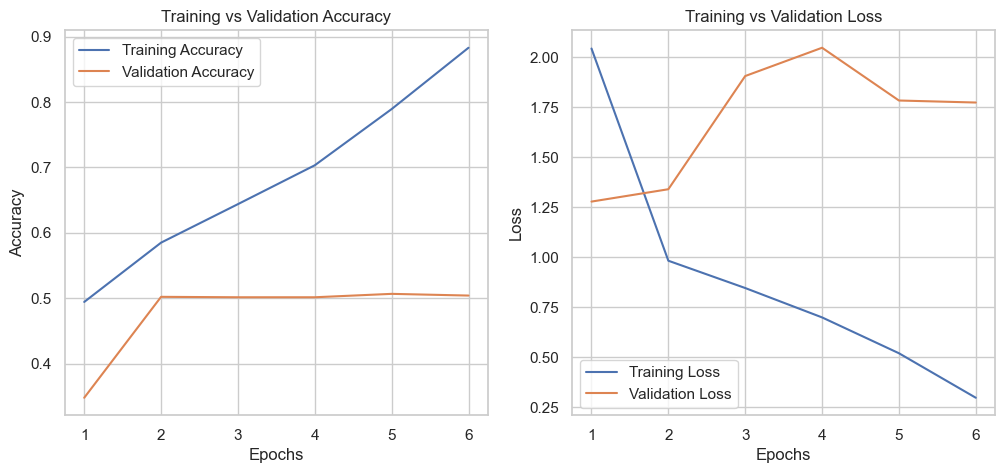

In [ ]:
# Extract training history
epochs = range(1, len(cnn_52.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_52.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_52.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_52.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_52.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [ ]:
test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy: 0.3689 - auc: 0.7186 - loss: 1.2688 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Accuracy: [1.2622008323669434, 0.35859376192092896, 0.7195329666137695, 0.0, 0.0]


In [ ]:
cnn_53 = model.fit(
                X_train_final, y_train_final,  # Training data
                validation_data=(X_val, y_val),  # Validation data
                epochs=15,  # Number of training cycles
                batch_size=64,  # Adjust batch size based on available memory
                verbose=1,  # Shows progress during training,
                callbacks=[early_stopping, model_checkpoint]

)

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4206 - auc: 0.6925 - loss: 3.0694 - precision: 0.4248 - recall: 0.2222
Epoch 1: val_loss improved from inf to 1.16223, saving model to best_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.4214 - auc: 0.6930 - loss: 3.0501 - precision: 0.4257 - recall: 0.2239 - val_accuracy: 0.5013 - val_auc: 0.7897 - val_loss: 1.1622 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5454 - auc: 0.8143 - loss: 1.0904 - precision: 0.5697 - recall: 0.4852
Epoch 2: val_loss did not improve from 1.16223
56/56 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.5452 - auc: 0.8143 - loss: 1.0904 - precision: 0.5696 - recall: 0.4850 - val_accuracy: 0.5013 - val_auc: 0.7567 - val_loss: 1.2680 - val_precision: 0.5013 - val_recall: 0.5013
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5757 - auc: 0.8379 - loss: 0.9619 - precision: 0.6052 - recall: 0.5006
Ep

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

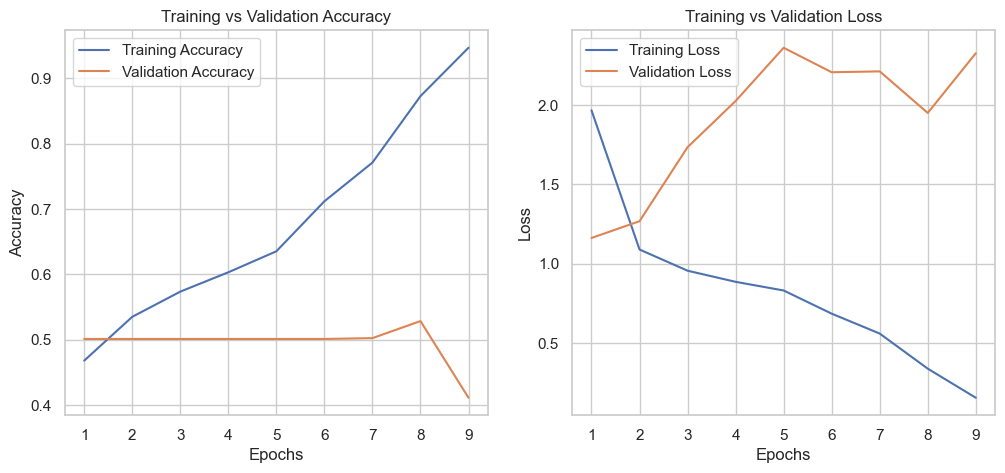

In [ ]:
# Extract training history
epochs = range(1, len(cnn_53.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_53.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_53.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_53.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_53.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [ ]:
test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - accuracy: 0.4778 - auc: 0.7791 - loss: 1.1726 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Accuracy: [1.161853313446045, 0.49531251192092896, 0.7875187397003174, 0.0, 0.0]


### CNN 6 <br />Next attempt at learning_rate=0.001: 10 epochs, 64 batch size, dropout layers set  to 0.3, and leaky relu... the accuracy was 54% train, 19% test

In [ ]:
cnn_6 = model.fit(
                X_train_final, y_train_final,  # Training data
                validation_data=(X_val, y_val),  # Validation data
                epochs=10,  # Number of training cycles
                batch_size=64,  # Adjust batch size based on available memory
                verbose=1  # Shows progress during training
)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.3791 - auc: 0.6305 - loss: 10.3062 - precision: 0.3786 - recall: 0.3673 - val_accuracy: 0.3405 - val_auc: 0.6867 - val_loss: 4.7120 - val_precision: 0.3405 - val_recall: 0.3405
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.4674 - auc: 0.7479 - loss: 1.8896 - precision: 0.4766 - recall: 0.4490 - val_accuracy: 0.3477 - val_auc: 0.6254 - val_loss: 3.4647 - val_precision: 0.3477 - val_recall: 0.3477
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 190s 3s/step - accuracy: 0.4685 - auc: 0.7635 - loss: 1.5840 - precision: 0.4869 - recall: 0.4454 - val_accuracy: 0.3477 - val_auc: 0.7410 - val_loss: 1.7541 - val_precision: 0.3477 - val_recall: 0.3477
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5068 - auc: 0.7885 - loss: 1.3205 - precision: 0.5353 - recall: 0.4732 - val_accuracy: 0.3470 - val_auc: 0.6395 - val_loss: 1.3149 - val_precision: 0.4000 - val_recall: 0.1120
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

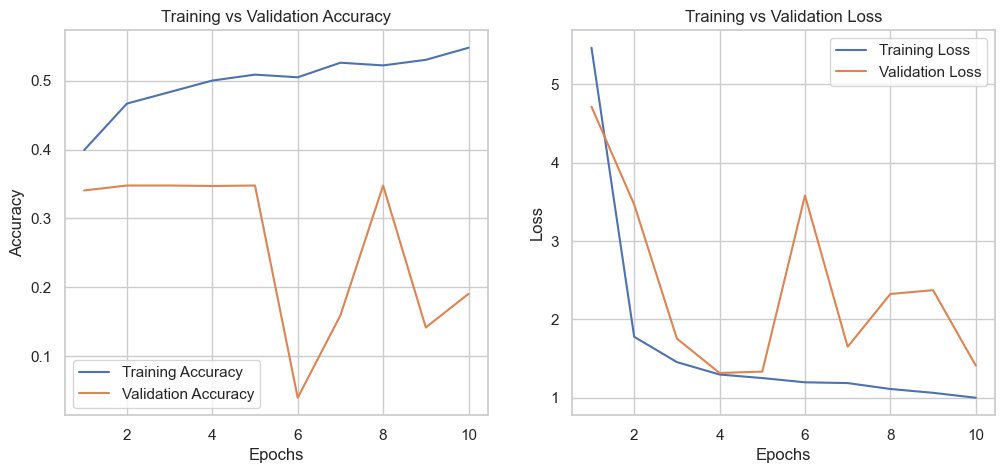

In [ ]:
# Extract training history
epochs = range(1, len(cnn_6.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_6.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_6.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()



In [ ]:
test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 210ms/step - accuracy: 0.1963 - auc: 0.5890 - loss: 1.4052 - precision: 0.2143 - recall: 0.0834
Test Accuracy: [1.4196454286575317, 0.17812499403953552, 0.5800046920776367, 0.19230769574642181, 0.07421875]


### CNN 7 <br />Attempt at learning_rate=0.0001: 10 epochs, 64 batch size, <u> dropout layers set  to 0.5 </u>... the accuracy was 92% train, 69% test

In [ ]:
cnn_7 = model.fit(
                X_train_final, y_train_final,  # Training data
                validation_data=(X_val, y_val),  # Validation data
                epochs=10,  # Number of training cycles
                batch_size=64,  # Adjust batch size based on available memory
                verbose=1  # Shows progress during training
)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.4331 - auc: 0.6996 - loss: 2.6509 - precision: 0.4356 - recall: 0.4186 - val_accuracy: 0.5013 - val_auc: 0.7645 - val_loss: 1.2229 - val_precision: 0.5013 - val_recall: 0.5013
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.5284 - auc: 0.7987 - loss: 1.3118 - precision: 0.5443 - recall: 0.4932 - val_accuracy: 0.5013 - val_auc: 0.7723 - val_loss: 1.3502 - val_precision: 0.5013 - val_recall: 0.5013
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.5597 - auc: 0.8271 - loss: 1.1414 - precision: 0.5791 - recall: 0.5218 - val_accuracy: 0.3626 - val_auc: 0.7139 - val_loss: 1.5103 - val_precision: 0.3619 - val_recall: 0.3600
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.5977 - auc: 0.8551 - loss: 1.0353 - precision: 0.6272 - recall: 0.5644 - val_accuracy: 0.5013 - val_auc: 0.7880 - val_loss: 1.8582 - val_precision: 0.5013 - val_recall: 0.5013
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

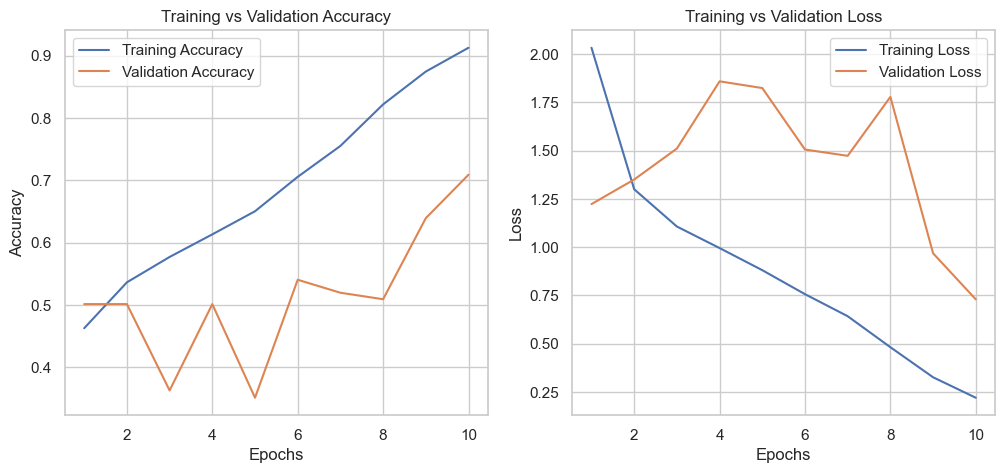

In [ ]:
# Extract training history
epochs = range(1, len(cnn_7.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_7.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_7.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()



In [ ]:
test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.6991 - auc: 0.9105 - loss: 0.8014 - precision: 0.7070 - recall: 0.6965
Test Accuracy: [0.7451363801956177, 0.717968761920929, 0.919391393661499, 0.7294493317604065, 0.714062511920929]


### CNN 8 <br />Attempt at learning_rate=0.0001: 10 epochs, 128 batch size, <u> dropout layers set  to 0.5 </u>... the accuracy was 87% train, 43% test

In [ ]:
cnn_8 = model.fit(
                X_train_final, y_train_final,  # Training data
                validation_data=(X_val, y_val),  # Validation data
                epochs=10,  # Number of training cycles
                batch_size=128,  # Adjust batch size based on available memory
                verbose=1  # Shows progress during training
)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.4151 - auc: 0.6885 - loss: 3.1879 - precision: 0.4195 - recall: 0.4031 - val_accuracy: 0.5013 - val_auc: 0.7508 - val_loss: 1.2586 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.5242 - auc: 0.7965 - loss: 1.2888 - precision: 0.5389 - recall: 0.4836 - val_accuracy: 0.3477 - val_auc: 0.7120 - val_loss: 1.1991 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.5459 - auc: 0.8245 - loss: 1.1295 - precision: 0.5688 - recall: 0.5010 - val_accuracy: 0.3477 - val_auc: 0.7109 - val_loss: 1.2439 - val_precision: 0.4935 - val_recall: 0.0247
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step - accuracy: 0.6003 - auc: 0.8519 - loss: 1.0271 - precision: 0.6270 - recall: 0.5602 - val_accuracy: 0.3477 - val_auc: 0.7101 - val_loss: 1.3633 - val_precision: 0.3477 - val_recall: 0.3477
Epoch 5/10
28/28 ━━━

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

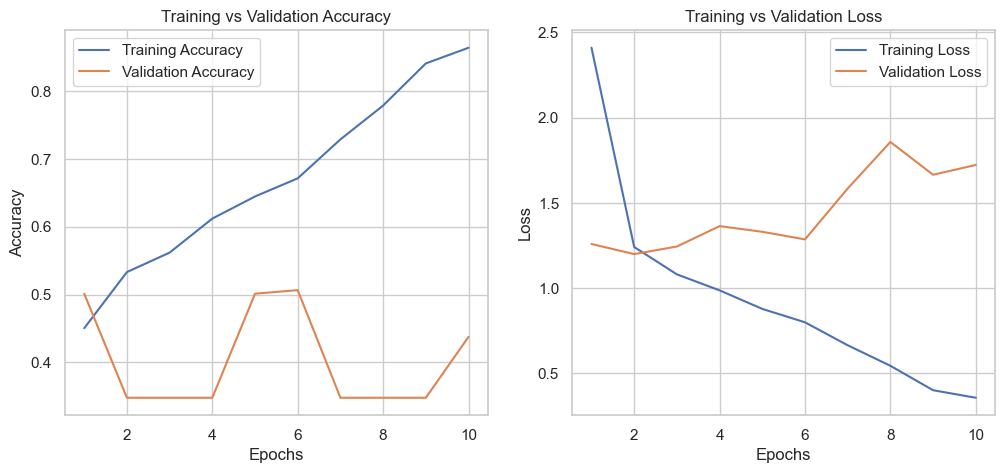

In [ ]:
# Extract training history
epochs = range(1, len(cnn_8.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_8.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_8.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_8.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_8.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()



In [ ]:
test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.4391 - auc: 0.7486 - loss: 1.7357 - precision: 0.4388 - recall: 0.4385
Test Accuracy: [1.6871265172958374, 0.4320312440395355, 0.7528474926948547, 0.43158718943595886, 0.4312500059604645]


### CNN 9 <br />Attempt at learning_rate=0.0001: 10 epochs, 128 batch size, <u> dropout layers set  to 0.3 </u>... the accuracy was 98% train, 58% test

In [ ]:
cnn_9 = model.fit(
                X_train_final, y_train_final,  # Training data
                validation_data=(X_val, y_val),  # Validation data
                epochs=10,  # Number of training cycles
                batch_size=128,  # Adjust batch size based on available memory
                verbose=1  # Shows progress during training
)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.5538 - auc: 0.8139 - loss: 1.1700 - precision: 0.5812 - recall: 0.5156 - val_accuracy: 0.5013 - val_auc: 0.7639 - val_loss: 1.2445 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.5983 - auc: 0.8573 - loss: 0.9060 - precision: 0.6477 - recall: 0.5332 - val_accuracy: 0.3477 - val_auc: 0.7130 - val_loss: 1.1990 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.6588 - auc: 0.8923 - loss: 0.7817 - precision: 0.7038 - recall: 0.5877 - val_accuracy: 0.3477 - val_auc: 0.7181 - val_loss: 1.1599 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 154s 6s/step - accuracy: 0.7233 - auc: 0.9255 - loss: 0.6458 - precision: 0.7670 - recall: 0.6688 - val_accuracy: 0.3477 - val_auc: 0.7163 - val_loss: 1.3387 - val_precision: 0.3477 - val_recall: 0.3477
Epoch 5/10
2

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

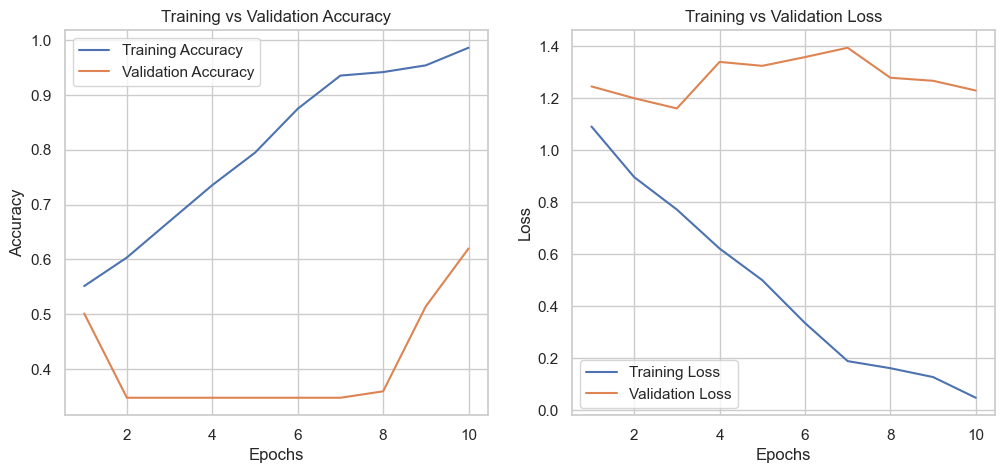

In [ ]:
# Extract training history
epochs = range(1, len(cnn_9.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_9.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_9.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_9.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_9.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()



In [ ]:
test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.5894 - auc: 0.8391 - loss: 1.2598 - precision: 0.6002 - recall: 0.5778
Test Accuracy: [1.2193036079406738, 0.608593761920929, 0.8489667177200317, 0.6150729060173035, 0.592968761920929]


## <center><font color="navy"> Major changes to this third set of experiments: 0.3 dropout layers, leaky relu activation function, SGD optimizer

### CNN 10 <br />SGD optimizer at learning rate = 0.01 and momemtum = 0.0, 10 epochs, 64 batch size, dropout layers at 0.3 w/ leaky relu

In [ ]:
cnn_10 = model.fit(
                X_train_final, y_train_final,  # Training data
                validation_data=(X_val, y_val),  # Validation data
                epochs=10,  # Number of training cycles
                batch_size=64,  # Adjust batch size based on available memory
                verbose=1,  # Shows progress during training
                callbacks=[early_stopping, model_checkpoint]  # Add callbacks
)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4233 - auc: 0.6708 - loss: 4.9469 - precision: 0.4409 - recall: 0.3706
Epoch 1: val_loss improved from inf to 1.57631, saving model to best_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.4239 - auc: 0.6719 - loss: 4.9039 - precision: 0.4419 - recall: 0.3705 - val_accuracy: 0.1413 - val_auc: 0.2792 - val_loss: 1.5763 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5256 - auc: 0.8111 - loss: 0.9948 - precision: 0.6193 - recall: 0.3758
Epoch 2: val_loss improved from 1.57631 to 1.46931, saving model to best_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.5255 - auc: 0.8112 - loss: 0.9945 - precision: 0.6189 - recall: 0.3758 - val_accuracy: 0.1413 - val_auc: 0.5646 - val_loss: 1.4693 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5234 - auc: 0.8184 - loss: 0.9593 - precision: 0.6068 - recall: 0.3659
Epoch 3: val_loss improved from 1.46931 to 1.15260, saving model to best_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5237 - auc: 0.8186 - loss: 0.9590 - precision: 0.6069 - recall: 0.3662 - val_accuracy: 0.3477 - val_auc: 0.7391 - val_loss: 1.1526 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5428 - auc: 0.8381 - loss: 0.9140 - precision: 0.6168 - recall: 0.4060
Epoch 4: val_loss did not improve from 1.15260
56/56 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.5427 - auc: 0.8380 - loss: 0.9141 - precision: 0.6170 - recall: 0.4060 - val_accuracy: 0.3477 - val_auc: 0.7545 - val_loss: 1.2528 - val_precision: 0.3477 - val_recall: 0.3477
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5685 - auc: 0.8440 - loss: 0.8953 - precision: 0.6585 - recall: 0.4250
Epoch 5: val_loss did not improve from 1.15260
56/56 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.5683 - auc: 0.8440 - loss: 0.8953 - precision: 0.6582 - recall: 0.4249 - val_accuracy: 0.3477 - val_auc: 0.6446 - va

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

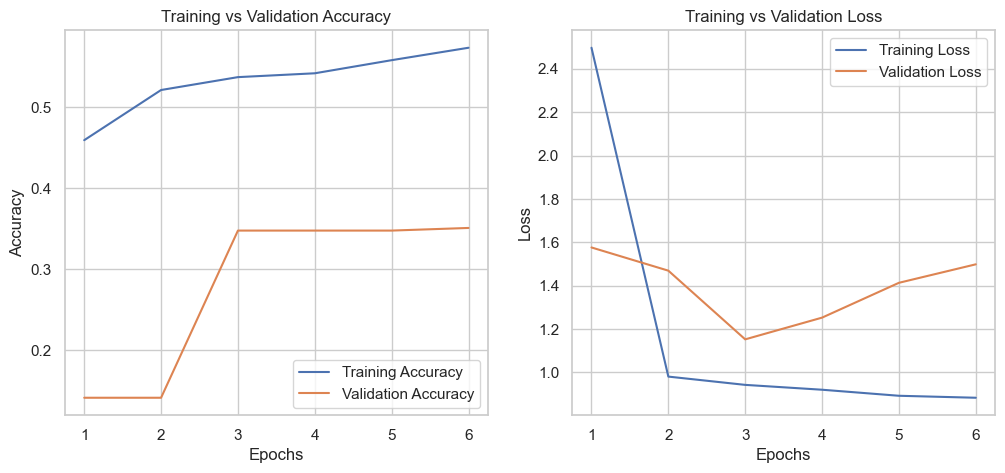

In [ ]:
# Extract training history
epochs = range(1, len(cnn_10.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_10.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_10.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_10.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_10.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()



In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# Load the best saved model
best_model = load_model('best_model.h5')

# Evaluate on test data
test_acc = best_model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.3689 - auc: 0.7392 - loss: 1.1490 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Accuracy: [1.1524970531463623, 0.35859376192092896, 0.7399286031723022, 0.0, 0.0]


### CNN 11 <br />SGD optimizer at learning rate = 0.01, momentum = 0.9, 10 epochs, 64 batch size, dropout layers at 0.3 w/ leaky relu

### CNN 12 <br />SGD optimizer at learning rate = 0.1, momentum = 0.9, 10 epochs, 64 batch size, dropout layers at 0.3 w/ leaky relu

### CNN 13 <br /> at learning rate 0.005, momentum = 0.95: 10 epochs, 64 batch size, dropout layers set to 0.3 w/ leaky relu. accuracy was % train, % test


### CNN 14 <br /> at learning rate 0.001, momentum = 0.5: 10 epochs, 64 batch size, dropout layers set to 0.3 w/ leaky relu. accuracy was % train, % test


### CNN 15 <br /> at learning rate 0.1, momentum = 0.6: 10 epochs, 64 batch size, dropout layers set to 0.3 w/ leaky relu. accuracy was % train, % test


### CNN 16 <br /> at learning rate 0.001, momentum = 0.99: 10 epochs, 64 batch size, dropout layers set to 0.3 w/ leaky relu. accuracy was % train, % test

### CNN 17 <br />at learning rate 0.2, momentum = 0.3: 10 epochs, 64 batch size, dropout layers set to 0.3 w/ leaky relu. accuracy was % train, % test


## <center><font color="navy">This next section explored simpler architectures (i.e., less blocks) compared to the previous four conv block model:

### Two conv blocks. As a result of previous experiments, the activation function selected was leaky relu, Adam optimizer set at a learning rate of 0.0001, and with a loss function of categorical cross-entropy

In [20]:
def build_model(hp):
    model = Sequential()

    # Explicitly define the input shape
    model.add(Input(shape=(128, 128, 1)))

    # First Conv Block
    model.add(Conv2D(hp.Choice('filters_1', [32, 64]), (3,3), activation='leaky_relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    # Second Conv Block
    model.add(Conv2D(hp.Choice('filters_2', [64, 128, 256]), (3,3), activation='leaky_relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(hp.Choice('filters_2', [64, 128, 256]), (3,3), activation='leaky_relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    # Flatten layer
    model.add(Flatten())

    # Fully Connected Layers
    model.add(Dense(hp.Int('dense_units_1', 256, 512, step=128), activation='leaky_relu'))
    model.add(Dropout(hp.Choice('dropout_1', [0.3])))
    model.add(Dense(hp.Int('dense_units_2', 128, 256, step=64), activation='leaky_relu'))
    model.add(Dropout(hp.Choice('dropout_2', [0.3])))

    # Output Layer
    model.add(Dense(4, activation='softmax'))  # 4 classes

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-4])),
        loss='categorical_crossentropy',
        metrics=metrics
    )

    return model

# Keras Tuner - Random Search
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=4,  # Number of different models to test
    executions_per_trial=1,  # Number of times each model is trained
    directory='tuner_results',
    project_name='cnn_tuning'
)

In [ ]:
# Run the search
tuner.search(X_train_final, y_train_final, epochs=8, validation_data=(X_val, y_val), verbose=1)

Trial 4 Complete [00h 13m 16s]
val_accuracy: 0.900390625

Best val_accuracy So Far: 0.919921875
Total elapsed time: 02h 49m 37s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.values)

{'filters_1': 32, 'filters_2': 128, 'dense_units_1': 512, 'dropout_1': 0.3, 'dense_units_2': 192, 'dropout_2': 0.3, 'learning_rate': 0.0001}


In [22]:
model = Sequential([

                    # Input Layer (explicitly define input size)
    Input(shape=(128, 128, 1)),  # This is the correct way to define the input shape

    # Input Layer
    Conv2D(32, (3,3), activation='leaky_relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # Second Conv Block
    Conv2D(128, (3,3), activation='leaky_relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='leaky_relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # Flatten layer
    Flatten(),

    # Fully Connected Layers
    Dense(512, activation='leaky_relu'),
    Dropout(0.3),
    Dense(192, activation='leaky_relu'),
    Dropout(0.3),

    # Output Layer
    Dense(4, activation='softmax')  # 4 classes
])

In [ ]:
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train_final, y_train_final, epochs=8,
               validation_data=(X_val, y_val),
               batch_size= 32,  # Adjust batch size based on available memory
               verbose=1,  # Shows progress during training,
               callbacks=[early_stopping, model_checkpoint]  )

Epoch 1/8
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4675 - auc: 0.8332 - loss: 7.0675 - precision: 0.6583 - recall: 0.6520
Epoch 1: val_accuracy improved from -inf to 0.50130, saving model to best_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.4677 - auc: 0.8329 - loss: 7.0457 - precision: 0.6577 - recall: 0.6514 - val_accuracy: 0.5013 - val_auc: 0.6675 - val_loss: 6.7069 - val_precision: 0.5013 - val_recall: 0.5013
Epoch 2/8
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5565 - auc: 0.7855 - loss: 2.3870 - precision: 0.5610 - recall: 0.5486
Epoch 2: val_accuracy did not improve from 0.50130
112/112 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.5567 - auc: 0.7856 - loss: 2.3856 - precision: 0.5612 - recall: 0.5488 - val_accuracy: 0.5013 - val_auc: 0.6675 - val_loss: 12.1474 - val_precision: 0.5013 - val_recall: 0.5013
Epoch 3/8
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6555 - auc: 0.8553 - loss: 1.6222 - precision: 0.6597 - recall: 

In [ ]:
test_acc = best_model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.8566 - auc: 0.9680 - loss: 0.4433 - precision: 0.8670 - recall: 0.8540
Test Accuracy: [0.4179472327232361, 0.8617187738418579, 0.9713057279586792, 0.8686708807945251, 0.8578125238418579]


In [24]:
K.clear_session()

In [33]:
# Build the model
model = Sequential([

    # Input Layer (explicitly define input size)
    Input(shape=(128, 128, 1)),  # This is the correct way to define the input shape

    # First Conv Block
    Conv2D(32, (3,3), activation='leaky_relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # Second Conv Block
    Conv2D(128, (3,3), activation='leaky_relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='leaky_relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # Flatten layer
    Flatten(),

    # Fully Connected Layers
    Dense(512, activation='leaky_relu'),
    Dropout(0.3),
    Dense(192, activation='leaky_relu'),
    Dropout(0.3),

    # Output Layer
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Set your preferred learning rate
    loss='categorical_crossentropy',  # Appropriate loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy as a metric during training
)

# You can now train the model with model.fit()
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      67,109,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 192)                 │          98,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             772 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,394,692 (257.09 MB)

 Trainable params: 67,394,116 (257.09 MB)

 Non-trainable params: 576 (2.25 KB)

In [26]:
model.fit(X_train_final, y_train_final, epochs=8,
               validation_data=(X_val, y_val),
               batch_size= 32,  # Adjust batch size based on available memory
               verbose=1,  # Shows progress during training,
               callbacks=[early_stopping, model_checkpoint]  )



Epoch 1/8
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4759 - loss: 7.2744
Epoch 1: val_accuracy improved from -inf to 0.50130, saving model to best_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 26s 119ms/step - accuracy: 0.4762 - loss: 7.2481 - val_accuracy: 0.5013 - val_loss: 7.5727
Epoch 2/8
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5700 - loss: 2.2380
Epoch 2: val_accuracy did not improve from 0.50130
112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - accuracy: 0.5701 - loss: 2.2384 - val_accuracy: 0.5013 - val_loss: 6.7303
Epoch 3/8
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6643 - loss: 1.5907
Epoch 3: val_accuracy improved from 0.50130 to 0.50260, saving model to best_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.6644 - loss: 1.5896 - val_accuracy: 0.5026 - val_loss: 5.5571
Epoch 4/8
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7302 - loss: 1.1628
Epoch 4: val_accuracy improved from 0.50260 to 0.57682, saving model to

In [27]:
test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4092 - loss: 7.0759
Test Accuracy: [7.220282554626465, 0.40546876192092896]


### LOOCV

In [ ]:
# Set up CV
num_classes=num_classes

# Initialize LOOCV
loo = LeaveOneOut()
accuracies = []

In [ ]:
# 1. Combine the datasets
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

# 2. Separate features (X) and labels (y)
X = combined_data['img_arr']  # Features (image arrays)
y = combined_data['label']  # Labels


print(X)
print(y)

0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
                              ...                        
6395    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
6396    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
6397    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
6398    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
6399    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: img_arr, Length: 6400, dtype: object
0       2
1       0
2       3
3       3
4       2
       ..
6395    0
6396    3
6397    3
6398    2
6399    3
Name: label, Length: 6400, dtype: int64


In [ ]:
X = np.stack(X.values)  # Convert list of arrays into a single 4D NumPy array

# Ensure the shape is (num_samples, 128, 128, 1) for grayscale images
if X.ndim == 3:
    X = np.expand_dims(X, axis=-1)

# Normalize images to range [0,1] if necessary
X = X.astype('float32') / 255.0

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert labels to integers

# Check the unique mapping (useful for debugging)
print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

# Convert to one-hot encoding
num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes=num_classes)

print(X)
print(y)
print(y_cat)

{0: 0, 1: 1, 2: 2, 3: 3}
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]

In [ ]:
for train_idx, test_idx in loo.split(X):
    print(f"\nLOOCV Iteration - Test Sample: {test_idx[0]}")

    # Split Data: One sample is test, rest are training
    X_train_cv, X_test_cv = X[train_idx], X[test_idx]
    y_train_cv, y_test_cv = y_cat[train_idx], y_cat[test_idx]

    # Define CNN model
    input_shape=(128,128,1)
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='leaky_relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(192, activation='leaky_relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=metrics)

    # Train model
    model.fit(X_train_cv, y_train_cv, epochs=1, batch_size=32, verbose=1)

    # Evaluate on the Left-Out Test Sample
    acc = model.evaluate(X_test_cv, y_test_cv, verbose=0)
    accuracies.append(acc)
    print(f"Test Accuracy: {acc}")


LOOCV Iteration - Test Sample: 0
200/200 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.4346 - auc: 0.6793 - loss: 5.8872 - precision: 0.4376 - recall: 0.4313


Test Accuracy: [0.0, 1.0, 1.0, 1.0, 1.0]

LOOCV Iteration - Test Sample: 1
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 68ms/step - accuracy: 0.4441 - auc: 0.6862 - loss: 5.8631 - precision: 0.4481 - recall: 0.4400


Test Accuracy: [18.290355682373047, 0.0, 0.3333333134651184, 0.0, 0.0]

LOOCV Iteration - Test Sample: 2
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.4454 - auc: 0.6816 - loss: 6.3891 - precision: 0.4479 - recall: 0.4404


Test Accuracy: [11.971583366394043, 0.0, 0.3333333134651184, 0.0, 0.0]

LOOCV Iteration - Test Sample: 3


KeyboardInterrupt: 

In [ ]:
# Compute Final LOOCV Accuracy
final_accuracy = np.mean(accuracies)
print(f"\nFinal LOOCV Accuracy: {final_accuracy}")

### Stratified 5 Kfold CV:

In [ ]:
# Clear session to avoid memory issues
K.clear_session()

# Shuffle data to ensure randomness
X, y_cat = shuffle(X, y_cat, random_state=42)

# Stratified K-Fold setup
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Function to create CNN model
def create_cnn():
    input_shape=(128,128,1)
    model = keras.Sequential([
        keras.layers.Input(shape=input_shape),  # Explicit input layer
        keras.layers.Conv2D(32, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='leaky_relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(192, activation='leaky_relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Store accuracies
accuracies = []
losses = []

# K-Fold Cross-Validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}/{n_splits}")

    # Split dataset
    X_train_cv, X_test_cv = X[train_index], X[test_index]
    y_train_cv, y_test_cv = y_cat[train_index], y_cat[test_index]

    # Compute Class Weights (use original y labels, not one-hot encoded)
    class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y[train_index])
    class_weight_dict = dict(enumerate(class_weights))

    # Create a new CNN model instance for each fold
    model = create_cnn()

    # Train the model
    model.fit(X_train_cv, y_train_cv, epochs=8, batch_size=32,
              verbose=1, class_weight=class_weight_dict)  # Include class weights

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_cv, y_test_cv, verbose=0)
    accuracies.append(accuracy)
    losses.append(loss)
    print(f"Fold {fold+1} Loss: {loss}, Accuracy: {accuracy}\n")

# Print final cross-validation results
final_loss = np.mean(losses)
final_accuracy = np.mean(accuracies)

print(f"Final Average Loss across {n_splits} folds: {final_loss}")
print(f"Final Average Accuracy across {n_splits} folds: {final_accuracy}")

Fold 1/5
Epoch 1/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.3378 - loss: 14.6160
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.3270 - loss: 10.0112
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.3823 - loss: 6.5465
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3831 - loss: 5.6503
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4250 - loss: 3.8387
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.4817 - loss: 3.1931
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4809 - loss: 3.0924
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5414 - loss: 1.8055


Fold 1 Loss: 1.9695736169815063, Accuracy: 0.5796874761581421

Fold 2/5
Epoch 1/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.2900 - loss: 15.9019
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.3260 - loss: 9.2163
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4451 - loss: 3.9601
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.4204 - loss: 5.0464
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.4850 - loss: 2.9676
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4941 - loss: 2.5365
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5132 - loss: 2.8354
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5494 - loss: 2.0083


Fold 2 Loss: 1.0425974130630493, Accuracy: 0.672656238079071

Fold 3/5
Epoch 1/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.3098 - loss: 15.7683
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.3211 - loss: 9.2819
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.3790 - loss: 7.2422
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.4205 - loss: 4.9460
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.4769 - loss: 2.8644
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.4735 - loss: 2.9938
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.4663 - loss: 3.3321
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5711 - loss: 1.5835


Fold 3 Loss: 1.036763310432434, Accuracy: 0.659375011920929

Fold 4/5
Epoch 1/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.3116 - loss: 20.2393
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.3149 - loss: 9.4450
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.3903 - loss: 5.2729
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.4715 - loss: 2.5433
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.4472 - loss: 3.1391
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.4987 - loss: 2.0836
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5460 - loss: 1.6141
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5519 - loss: 1.6002


Fold 4 Loss: 1.2296644449234009, Accuracy: 0.596875011920929

Fold 5/5
Epoch 1/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.2869 - loss: 18.6599
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.3584 - loss: 9.9745
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.3825 - loss: 6.1234
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.4396 - loss: 3.7432
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.4659 - loss: 3.2055
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.5215 - loss: 2.1365
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5247 - loss: 2.0009
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4805 - loss: 2.9446


Fold 5 Loss: 1.1379400491714478, Accuracy: 0.6507812738418579

Final Average Loss across 5 folds: 1.2833077669143678
Final Average Accuracy across 5 folds: 0.6318750023841858


###  5 Kfold CV:

In [ ]:
# Clear session to avoid memory issues
K.clear_session()# Initialize 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracy results
accuracy_per_fold = []
loss_per_fold = []

# Callbacks
checkpoint = ModelCheckpoint(
        '10kfold_mri_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,  # Stop training if val_loss does not improve for 5 consecutive epochs
    restore_best_weights=True  # Restore the best model weights after stopping
    )

def create_cnn():
    input_shape=(128,128,1)
    model = keras.Sequential([
        keras.layers.Input(shape=input_shape),  # Explicit input layer
        keras.layers.Conv2D(32, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='leaky_relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(192, activation='leaky_relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform cross-validation
for fold_no, (train_idx, val_idx) in enumerate(kf.split(X), start=1):
    print(f"\nTraining on Fold {fold_no}/5...")

    # Split data into training and validation sets
    x_train_fold, x_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y_cat[train_idx], y_cat[val_idx]

    # Create a new model instance for each fold
    model = create_cnn()

    # Train the model
    model.fit(
        x_train_fold, y_train_fold,
        epochs=8, batch_size=64,
        validation_data=(x_val_fold, y_val_fold),
        verbose=1,
        callbacks=[checkpoint, early_stopping]
    )

        # Evaluate the model
    loss, accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Loss: {loss}, Accuracy: {accuracy}")

    # Store results
    loss_per_fold.append(loss)
    accuracy_per_fold.append(accuracy)

# Print final cross-validation results
print("\nCross-Validation Results:")
print(f"Final Average Accuracy: {np.mean(accuracy_per_fold)}")
print(f"Final Average Loss: {np.mean(loss_per_fold)}")


Training on Fold 1/5...
Epoch 1/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4370 - loss: 7.5385
Epoch 1: val_accuracy improved from -inf to 0.01484, saving model to 10kfold_mri_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 29s 221ms/step - accuracy: 0.4373 - loss: 7.4996 - val_accuracy: 0.0148 - val_loss: 6.7922
Epoch 2/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5163 - loss: 1.9661
Epoch 2: val_accuracy improved from 0.01484 to 0.49141, saving model to 10kfold_mri_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 202ms/step - accuracy: 0.5165 - loss: 1.9656 - val_accuracy: 0.4914 - val_loss: 5.9215
Epoch 3/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5910 - loss: 1.4456
Epoch 3: val_accuracy improved from 0.49141 to 0.49297, saving model to 10kfold_mri_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 279ms/step - accuracy: 0.5912 - loss: 1.4451 - val_accuracy: 0.4930 - val_loss: 2.8536
Epoch 4/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6335 - loss: 1.3498


Fold 1 - Loss: 0.6660328507423401, Accuracy: 0.774218738079071

Training on Fold 2/5...
Epoch 1/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4191 - loss: 9.2337
Epoch 1: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.4196 - loss: 9.1815 - val_accuracy: 0.0063 - val_loss: 15.5291
Epoch 2/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4983 - loss: 2.3424
Epoch 2: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.4984 - loss: 2.3423 - val_accuracy: 0.0063 - val_loss: 21.4375
Epoch 3/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5560 - loss: 1.9028
Epoch 3: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.5561 - loss: 1.9022 - val_accuracy: 0.0063 - val_loss: 10.3101
Epoch 4/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6133 - loss: 1.4410
Epoch 4: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━

Fold 2 - Loss: 0.31280282139778137, Accuracy: 0.897656261920929

Training on Fold 3/5...
Epoch 1/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4273 - loss: 8.1849
Epoch 1: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.4277 - loss: 8.1369 - val_accuracy: 0.0109 - val_loss: 3.7418
Epoch 2/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5168 - loss: 2.0142
Epoch 2: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.5170 - loss: 2.0123 - val_accuracy: 0.4906 - val_loss: 2.8910
Epoch 3/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5735 - loss: 1.5409
Epoch 3: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.5735 - loss: 1.5408 - val_accuracy: 0.5086 - val_loss: 2.3525
Epoch 4/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6086 - loss: 1.4337
Epoch 4: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━

Fold 3 - Loss: 0.36010298132896423, Accuracy: 0.875781238079071

Training on Fold 4/5...
Epoch 1/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4427 - loss: 9.3258
Epoch 1: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.4429 - loss: 9.2731 - val_accuracy: 0.4734 - val_loss: 1.5776
Epoch 2/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5240 - loss: 1.9652
Epoch 2: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.5241 - loss: 1.9644 - val_accuracy: 0.5914 - val_loss: 0.9680
Epoch 3/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5790 - loss: 1.6520
Epoch 3: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.5791 - loss: 1.6520 - val_accuracy: 0.4734 - val_loss: 5.5548
Epoch 4/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6316 - loss: 1.2806
Epoch 4: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━

Fold 4 - Loss: 0.339242160320282, Accuracy: 0.885937511920929

Training on Fold 5/5...
Epoch 1/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4244 - loss: 8.1264
Epoch 1: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 0.4248 - loss: 8.0829 - val_accuracy: 0.5109 - val_loss: 3.9935
Epoch 2/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5365 - loss: 1.8682
Epoch 2: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.5365 - loss: 1.8670 - val_accuracy: 0.5109 - val_loss: 5.0079
Epoch 3/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5821 - loss: 1.5696
Epoch 3: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.5822 - loss: 1.5694 - val_accuracy: 0.5109 - val_loss: 3.4056
Epoch 4/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6147 - loss: 1.3815
Epoch 4: val_accuracy did not improve from 0.77422
80/80 ━━━━━━━━━━━━━━━

Fold 5 - Loss: 0.3354576528072357, Accuracy: 0.890625

Cross-Validation Results:
Final Average Accuracy: 0.86484375
Final Average Loss: 0.4027276933193207


### Three conv blocks. As a result of previous experiments, the activation function selected was leaky relu, Adam optimizer set at a learning rate of 0.0001, and with a loss function of categorical cross-entropy. Filter 1 size was 32, and Filter 2 was kept at 128, both with filter sizes of (3,3). For the dropout layers, the previously identified values were included in the search range in this next randomsearch

In [ ]:
#Initial model:
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(128, 128, 1)))

    # First Conv Block
    model.add(Conv2D(hp.Choice('filters_1', [32]), (3,3), activation='leaky_relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    # Second Conv Block
    model.add(Conv2D(hp.Choice('filters_2', [128]), (3,3), activation='leaky_relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(hp.Choice('filters_2', [128]), (3,3), activation='leaky_relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    # Third Conv Block
    model.add(Conv2D(hp.Choice('filters_3', [128, 256, 512]), (3,3), activation='leaky_relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(hp.Choice('filters_3', [128, 256, 512]), (3,3), activation='leaky_relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    # Flatten layer
    model.add(Flatten())

    # Fully Connected Layers
    model.add(Dense(hp.Int('dense_units_1', 384, 512, step=128), activation='leaky_relu'))
    model.add(Dropout(hp.Choice('dropout_1', [0.3])))
    model.add(Dense(hp.Int('dense_units_2', 128, 256, step=64), activation='leaky_relu'))
    model.add(Dropout(hp.Choice('dropout_2', [0.3])))

    # Output Layer
    model.add(Dense(4, activation='softmax'))  # 4 classes

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-4])),
        loss='categorical_crossentropy',
        metrics=metrics
    )

    return model

# Keras Tuner - Random Search
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=4,  # Number of different models to test
    executions_per_trial=1,  # Number of times each model is trained
    directory='tuner_results',
    project_name='cnn_tuning'
)


In [ ]:
# Clear session to avoid memory issues
K.clear_session()

In [ ]:
# Run the search
tuner.search(X_train_final, y_train_final, epochs=8, validation_data=(X_val, y_val), verbose=1)


Trial 4 Complete [00h 11m 48s]
val_accuracy: 0.8671875

Best val_accuracy So Far: 0.9134114384651184
Total elapsed time: 00h 55m 14s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.values)

{'filters_1': 32, 'filters_2': 128, 'filters_3': 128, 'dense_units_1': 512, 'dropout_1': 0.3, 'dense_units_2': 128, 'dropout_2': 0.3, 'learning_rate': 0.0001}


In [ ]:
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train_final, y_train_final, epochs=8,
               validation_data=(X_val, y_val),
               batch_size= 32,  # Adjust batch size based on available memory
               verbose=1,  # Shows progress during training,
               callbacks=[early_stopping, model_checkpoint])

Epoch 1/8
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.4578 - auc: 0.8705 - loss: 3.0350 - precision: 0.6782 - recall: 0.6594
Epoch 1: val_accuracy improved from -inf to 0.50130, saving model to best_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 75s 643ms/step - accuracy: 0.4580 - auc: 0.8702 - loss: 3.0255 - precision: 0.6776 - recall: 0.6587 - val_accuracy: 0.5013 - val_auc: 0.7755 - val_loss: 1.1357 - val_precision: 0.5013 - val_recall: 0.5013
Epoch 2/8
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.5647 - auc: 0.8227 - loss: 1.1827 - precision: 0.5772 - recall: 0.5251
Epoch 2: val_accuracy did not improve from 0.50130
112/112 ━━━━━━━━━━━━━━━━━━━━ 74s 657ms/step - accuracy: 0.5647 - auc: 0.8227 - loss: 1.1826 - precision: 0.5772 - recall: 0.5251 - val_accuracy: 0.5013 - val_auc: 0.7916 - val_loss: 1.8169 - val_precision: 0.5013 - val_recall: 0.5013
Epoch 3/8
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.6088 - auc: 0.8567 - loss: 1.0286 - precision: 0.628

In [ ]:
test_acc = best_model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.4231 - auc: 0.6949 - loss: 3.4056 - precision: 0.4236 - recall: 0.4164
Test Accuracy: [3.542105197906494, 0.4242187440395355, 0.6930060982704163, 0.4253968298435211, 0.41874998807907104]


### Stratified 5 Kfold CV:

In [ ]:
# Clear session to avoid memory issues
K.clear_session()

# Shuffle data to ensure randomness
X, y_cat = shuffle(X, y_cat, random_state=42)

# Stratified K-Fold setup
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Function to create CNN model
def create_cnn():
    input_shape=(128,128,1)
    model = keras.Sequential([
        #Block 1
        keras.layers.Input(shape=input_shape),  # Explicit input layer
        keras.layers.Conv2D(32, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        #Block 2
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        #Block 3
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        #Final Pieces
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='leaky_relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation='leaky_relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Store accuracies
accuracies = []
losses = []

# K-Fold Cross-Validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}/{n_splits}")

    # Split dataset
    X_train_cv, X_test_cv = X[train_index], X[test_index]
    y_train_cv, y_test_cv = y_cat[train_index], y_cat[test_index]

    # Compute Class Weights (use original y labels, not one-hot encoded)
    class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y[train_index])
    class_weight_dict = dict(enumerate(class_weights))

    # Create a new CNN model instance for each fold
    model = create_cnn()

    # Train the model
    model.fit(X_train_cv, y_train_cv, epochs=8, batch_size=32,
              verbose=1, class_weight=class_weight_dict)  # Include class weights

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_cv, y_test_cv, verbose=0)
    accuracies.append(accuracy)
    losses.append(loss)
    print(f"Fold {fold+1} Loss: {loss}, Accuracy: {accuracy}\n")

# Print final cross-validation results
final_loss = np.mean(losses)
final_accuracy = np.mean(accuracies)

print(f"Final Average Loss across {n_splits} folds: {final_loss}")
print(f"Final Average Accuracy across {n_splits} folds: {final_accuracy}")

Fold 1/5
Epoch 1/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.2966 - loss: 5.0965
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.3639 - loss: 2.5744
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3531 - loss: 2.4715
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.3915 - loss: 1.9915
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.4048 - loss: 1.6898
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.4370 - loss: 1.4912
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4697 - loss: 1.4330
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4781 - loss: 1.1923


Fold 1 Loss: 1.0810154676437378, Accuracy: 0.520312488079071

Fold 2/5
Epoch 1/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.2956 - loss: 5.2785
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3783 - loss: 2.0880
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.3767 - loss: 2.3251
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4006 - loss: 1.9901
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.4255 - loss: 1.5328
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.4566 - loss: 1.5886
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.4650 - loss: 1.3569
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5418 - loss: 1.0053


Fold 2 Loss: 1.0394818782806396, Accuracy: 0.5679687261581421

Fold 3/5
Epoch 1/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.2907 - loss: 5.3649
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.3405 - loss: 2.8570
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3805 - loss: 1.9558
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4299 - loss: 1.7076
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4374 - loss: 1.5803
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4894 - loss: 1.1879
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5258 - loss: 1.0232
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5647 - loss: 0.8468


Fold 3 Loss: 0.8860517740249634, Accuracy: 0.62109375

Fold 4/5
Epoch 1/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.3189 - loss: 4.6184
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3633 - loss: 2.6591
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3851 - loss: 1.9851
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.4506 - loss: 1.3900
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4509 - loss: 1.2009
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4665 - loss: 1.0760
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5104 - loss: 0.9621
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5370 - loss: 0.9596


Fold 4 Loss: 1.7481834888458252, Accuracy: 0.328125

Fold 5/5
Epoch 1/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.2749 - loss: 5.5630
Epoch 2/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3440 - loss: 2.8798
Epoch 3/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.3545 - loss: 2.3829
Epoch 4/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3753 - loss: 1.8459
Epoch 5/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.4143 - loss: 1.5509
Epoch 6/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4287 - loss: 1.4411
Epoch 7/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4619 - loss: 1.3708
Epoch 8/8
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5223 - loss: 1.0381


Fold 5 Loss: 0.8807451128959656, Accuracy: 0.635937511920929

Final Average Loss across 5 folds: 1.1270955443382262
Final Average Accuracy across 5 folds: 0.5346874952316284


### 5 K-fold CV:

In [ ]:
# Clear session to avoid memory issues
K.clear_session()


# Initialize 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracy results
accuracy_per_fold = []
loss_per_fold = []

# Callbacks
checkpoint = ModelCheckpoint(
        '10kfold_mri_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,  # Stop training if val_loss does not improve for 5 consecutive epochs
    restore_best_weights=True  # Restore the best model weights after stopping
    )

def create_cnn():
    input_shape=(128,128,1)
    model = keras.Sequential([
        #Block 1
        keras.layers.Input(shape=input_shape),  # Explicit input layer
        keras.layers.Conv2D(32, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        #Block 2
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        #Block 3
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2, 2)),
        #Final Pieces
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='leaky_relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation='leaky_relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform cross-validation
for fold_no, (train_idx, val_idx) in enumerate(kf.split(X), start=1):
    print(f"\nTraining on Fold {fold_no}/5...")

    # Split data into training and validation sets
    x_train_fold, x_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y_cat[train_idx], y_cat[val_idx]

    # Create a new model instance for each fold
    model = create_cnn()

    # Train the model
    model.fit(
        x_train_fold, y_train_fold,
        epochs=8, batch_size=64,
        validation_data=(x_val_fold, y_val_fold),
        verbose=1,
        callbacks=[checkpoint, early_stopping]
    )
    # Load the best model before evaluation
    best_model = load_model('10kfold_mri_model.keras')

    # Evaluate the model
    loss, accuracy = best_model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Loss: {loss}, Accuracy: {accuracy}")

    # Store results
    loss_per_fold.append(loss)
    accuracy_per_fold.append(accuracy)

# Print final cross-validation results
print("\nCross-Validation Results:")
print(f"Final Average Accuracy: {np.mean(accuracy_per_fold)}")
print(f"Final Average Loss: {np.mean(loss_per_fold)}")


Training on Fold 1/5...
Epoch 1/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4094 - loss: 3.1391
Epoch 1: val_accuracy improved from -inf to 0.50469, saving model to 10kfold_mri_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 179ms/step - accuracy: 0.4100 - loss: 3.1235 - val_accuracy: 0.5047 - val_loss: 1.7437
Epoch 2/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5211 - loss: 1.1387
Epoch 2: val_accuracy did not improve from 0.50469
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.5212 - loss: 1.1388 - val_accuracy: 0.5047 - val_loss: 2.5391
Epoch 3/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5517 - loss: 1.0956
Epoch 3: val_accuracy did not improve from 0.50469
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.5516 - loss: 1.0956 - val_accuracy: 0.5047 - val_loss: 2.6715
Epoch 4/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5902 - loss: 0.9960
Epoch 4: val_accuracy did not improve from 0.50469
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/ste

Fold 1 - Loss: 0.7685402631759644, Accuracy: 0.696093738079071

Training on Fold 2/5...
Epoch 1/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4083 - loss: 3.0406
Epoch 1: val_accuracy did not improve from 0.69609
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.4090 - loss: 3.0254 - val_accuracy: 0.3555 - val_loss: 1.4500
Epoch 2/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5277 - loss: 1.1250
Epoch 2: val_accuracy did not improve from 0.69609
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.5277 - loss: 1.1250 - val_accuracy: 0.3555 - val_loss: 1.3676
Epoch 3/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5509 - loss: 1.0815
Epoch 3: val_accuracy did not improve from 0.69609
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.5511 - loss: 1.0811 - val_accuracy: 0.3562 - val_loss: 1.2464
Epoch 4/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6048 - loss: 0.9777
Epoch 4: val_accuracy did not improve from 0.69609
80/80 ━━━━━━━━━━━━━

Fold 2 - Loss: 0.5259740948677063, Accuracy: 0.813281238079071

Training on Fold 3/5...
Epoch 1/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4075 - loss: 3.6236
Epoch 1: val_accuracy did not improve from 0.69609
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.4081 - loss: 3.6050 - val_accuracy: 0.4852 - val_loss: 1.1826
Epoch 2/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5255 - loss: 1.1317
Epoch 2: val_accuracy did not improve from 0.69609
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.5254 - loss: 1.1316 - val_accuracy: 0.4852 - val_loss: 1.3607
Epoch 3/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5597 - loss: 1.0953
Epoch 3: val_accuracy did not improve from 0.69609
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.5598 - loss: 1.0951 - val_accuracy: 0.4852 - val_loss: 1.7256
Epoch 4/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5917 - loss: 0.9725
Epoch 4: val_accuracy did not improve from 0.69609
80/80 ━━━━━━━━━━━━━━

Fold 3 - Loss: 0.7171818614006042, Accuracy: 0.721875011920929

Training on Fold 4/5...
Epoch 1/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4209 - loss: 3.2072
Epoch 1: val_accuracy did not improve from 0.72188
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.4214 - loss: 3.1919 - val_accuracy: 0.3469 - val_loss: 1.4146
Epoch 2/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5140 - loss: 1.1312
Epoch 2: val_accuracy did not improve from 0.72188
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.5140 - loss: 1.1313 - val_accuracy: 0.3469 - val_loss: 1.4506
Epoch 3/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5681 - loss: 1.0526
Epoch 3: val_accuracy did not improve from 0.72188
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.5682 - loss: 1.0524 - val_accuracy: 0.4922 - val_loss: 1.6293
Epoch 4/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5982 - loss: 0.9732
Epoch 4: val_accuracy did not improve from 0.72188
80/80 ━━━━━━━━━━━━

Fold 4 - Loss: 0.48274660110473633, Accuracy: 0.8296874761581421

Training on Fold 5/5...
Epoch 1/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4431 - loss: 2.5209
Epoch 1: val_accuracy did not improve from 0.72188
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.4435 - loss: 2.5109 - val_accuracy: 0.5039 - val_loss: 1.3491
Epoch 2/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5029 - loss: 1.1244
Epoch 2: val_accuracy did not improve from 0.72188
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.5030 - loss: 1.1244 - val_accuracy: 0.5039 - val_loss: 1.4169
Epoch 3/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5726 - loss: 1.0312
Epoch 3: val_accuracy did not improve from 0.72188
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.5725 - loss: 1.0314 - val_accuracy: 0.5172 - val_loss: 1.3927
Epoch 4/8
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5997 - loss: 0.9613
Epoch 4: val_accuracy did not improve from 0.72188
80/80 ━━━━━━━━━━━━

Fold 5 - Loss: 0.46621790528297424, Accuracy: 0.8359375

Cross-Validation Results:
Final Average Accuracy: 0.7793749928474426
Final Average Loss: 0.5921321451663971


<br /><br/>
# <b><center><font color="navy">Experiment 1b: <br /> Impact of Data Augmentation on MRI Image Classification Using the Best CNN from Experiment 1a
<br /><br />

In [29]:
datagen = ImageDataGenerator(
    #preprocessing_function=adjust_brightness_and_contrast,  # Apply custom brightness and contrast adjustment
    width_shift_range=0.3,  # Shift width by 20%
    height_shift_range=0.3, # Shift height by 20%
    zoom_range=0.1,         # Zoom in/out
    fill_mode='nearest'     # Filling strategy for empty pixels
)

In [ ]:
#X_train, X_test, y_train_one_hot, y_test_one_hot

In [30]:
# Augment images
augmented_images = []
for img_array in train_data['img_arr'].values:
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 128, 128, 1)
    img_array = np.expand_dims(img_array, axis=-1)
    augmented_img = next(datagen.flow(img_array, batch_size=1))[0]  # Apply augmentation
    augmented_images.append(augmented_img)

# Stack images into a 4D NumPy array
X_train_augmented = np.stack(augmented_images)  # Convert list of arrays into a single 4D NumPy array

# Ensure the shape is (num_samples, 128, 128, 1) for grayscale images
#if X_train_augmented.ndim == 3:
#    X_train_augmented = np.expand_dims(X_train_augmented, axis=-1)

# Normalize images to range [0,1] if necessary
X_train_augmented = X_train_augmented.astype('float32') / 255.0

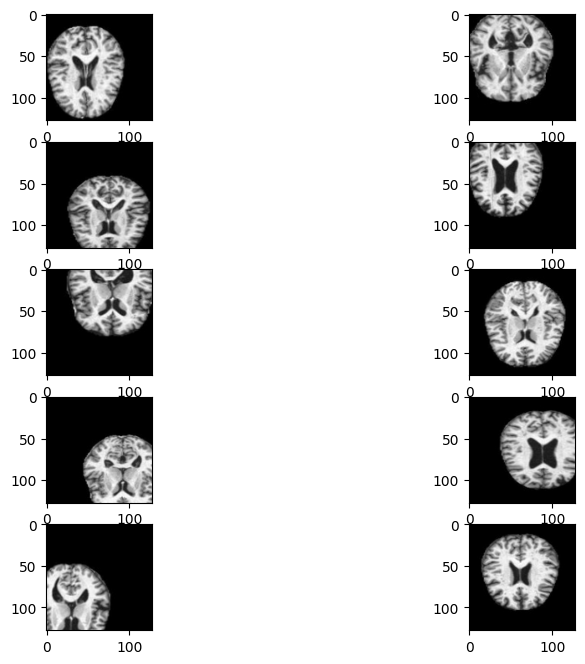

In [ ]:
# Define how many images to display
num_images = 10  # Display first 10 images

# Create a figure with subplots (5 rows, 2 columns)
fig, ax = plt.subplots(5, 2, figsize=(10, 8))

# Flatten the axes array for easy iteration
axs = ax.flatten()

# Loop through the first few augmented images and display them
for i in range(num_images):
    axs[i].imshow(X_train_augmented[i].squeeze(), cmap="gray")  # Squeeze to remove singleton dimens

In [31]:
# Split training data into training and validation sets (80% train, 30% val)
X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_train_augmented, y_train_one_hot, test_size=0.3, random_state=42, stratify=y_train_encoded)

In [32]:
K.clear_session()

In [ ]:
# Compile model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=metrics)

# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      67,109,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 192)                 │          98,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             772 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,394,692 (257.09 MB)

 Trainable params: 67,394,116 (257.09 MB)

 Non-trainable params: 576 (2.25 KB)

In [35]:
history = cnn_aug = model.fit(
                X_train_aug, y_train_aug,  # Training data
                validation_data=(X_val_aug, y_val_aug),  # Validation data
                epochs=10,  # Number of training cycles
                batch_size=32,  # Adjust batch size based on available memory
                verbose=1,  # Shows progress during training
                callbacks=[early_stopping, model_checkpoint] )

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4268 - loss: 5.1174
Epoch 1: val_accuracy did not improve from 0.90169
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.4269 - loss: 5.1043 - val_accuracy: 0.0098 - val_loss: 9.5622
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5062 - loss: 2.0678
Epoch 2: val_accuracy did not improve from 0.90169
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.5061 - loss: 2.0674 - val_accuracy: 0.0098 - val_loss: 32.3982
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5267 - loss: 1.5279
Epoch 3: val_accuracy did not improve from 0.90169
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5267 - loss: 1.5281 - val_accuracy: 0.0104 - val_loss: 22.3801
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5412 - loss: 1.4891
Epoch 4: val_accuracy did not improve from 0.90169
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.5412 - loss: 1.4891 - val_accurac

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training vs Validation Accuracy')

<Axes: >

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training vs Validation Loss')

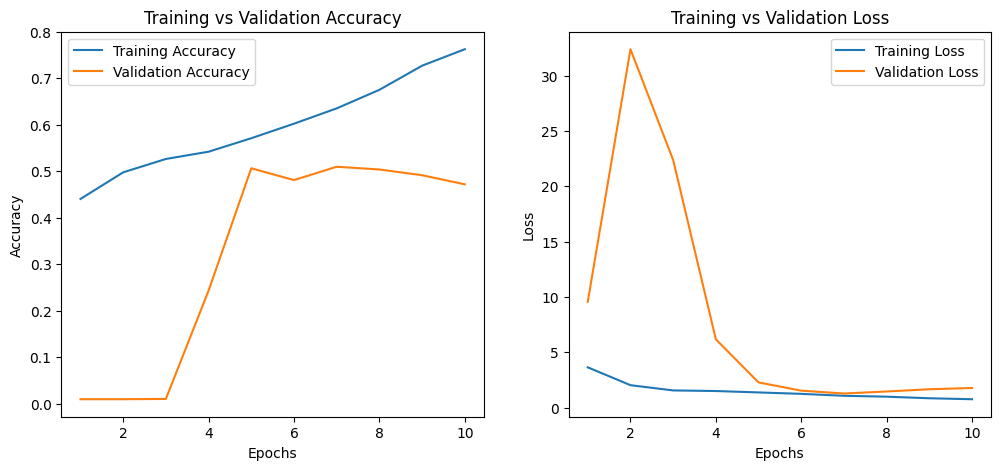

In [36]:
# Extract training history
epochs = range(1, len(cnn_aug.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, cnn_aug.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, cnn_aug.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, cnn_aug.history['loss'], label='Training Loss')
plt.plot(epochs, cnn_aug.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [37]:

test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3565 - loss: 1.6716
Test Accuracy: [1.6850637197494507, 0.35468751192092896]


<br /><br/>
# <b><center><font color="navy">Experiment 2a: <br />Transfer Learning for Alzheimer's Stage Classification: Leveraging CNNs with MRI Imaging
<br /><br />

### InceptionV3 Prep: Convert to RGB

In [ ]:
# Convert grayscale to 3 channels by duplicating the single channel
#X_train_rgb = np.repeat(X_train, 3, axis=-1)
#X_test_rgb = np.repeat(X_test, 3, axis=-1)

# Preprocess for InceptionV3
#X_train_rgb = preprocess_input(X_train_rgb)
#X_test_rgb = preprocess_input(X_test_rgb)

In [17]:
# Convert list of image arrays into a single NumPy array
X_train_rgb = np.stack(train_data['img_arr'].values).astype('float32')
X_test_rgb = np.stack(test_data['img_arr'].values).astype('float32')

# Ensure the shape is (num_samples, 128, 128, 3) for RGB images
if X_train_rgb.ndim == 3:
    X_train_rgb = np.expand_dims(X_train_rgb, axis=-1)  # Add channel dimension if missing
if X_test_rgb.ndim == 3:
    X_test_rgb = np.expand_dims(X_test_rgb, axis=-1)

# Handle grayscale images by converting to 3 channels if necessary
if X_train_rgb.shape[-1] == 1:
    X_train_rgb = np.repeat(X_train_rgb, 3, axis=-1)
if X_test_rgb.shape[-1] == 1:
    X_test_rgb = np.repeat(X_test_rgb, 3, axis=-1)

# Compute mean and standard deviation (channel-wise across all images)
mean = np.mean(X_train_rgb, axis=(0, 1, 2), keepdims=True)  # Compute mean per channel
std = np.std(X_train_rgb, axis=(0, 1, 2), keepdims=True)    # Compute std per channel

mean_test = np.mean(X_test_rgb, axis=(0, 1, 2), keepdims=True)  # Compute mean per channel
std_test = np.std(X_test_rgb, axis=(0, 1, 2), keepdims=True)    # Compute std per channel


# Apply standardization
X_train_rgb = (X_train_rgb - mean) / std
X_test_rgb = (X_test_rgb - mean_test) / std_test  # Use training set mean & std for test data

X_train_rgb.shape, X_test_rgb.shape


((5120, 128, 128, 3), (1280, 128, 128, 3))

In [ ]:
# Convert list of image arrays into a single 4D NumPy array
#X_train_rgb = np.stack(train_data['img_arr'].values).astype('float32') / 255.0  # Normalize while stacking
#X_test_rgb = np.stack(test_data['img_arr'].values).astype('float32') / 255.0    # Normalize while stacking

# Ensure the shape is (num_samples, 128, 128, 3) for RGB images
#if X_train_rgb.ndim == 3:
#    X_train_rgb = np.expand_dims(X_train_rgb, axis=-1)  # Add channel dimension if missing
#if X_test_rgb.ndim == 3:
#    X_test_rgb = np.expand_dims(X_test_rgb, axis=-1)

# Handle grayscale images by converting to 3 channels if necessary
#if X_train_rgb.shape[-1] == 1:
#    X_train_rgb = np.repeat(X_train_rgb, 3, axis=-1)
#if X_test_rgb.shape[-1] == 1:
#    X_test_rgb = np.repeat(X_test_rgb, 3, axis=-1)

#X_train_rgb.shape
#X_test_rgb.shape

(5120, 128, 128, 3)

(1280, 128, 128, 3)

In [50]:
# Create a custom model based on InceptionV3
def build_inception_model():
    # Set up input tensor for 128x128 images with 3 channels
    #input_tensor = Input(shape=(128, 128, 3))

    # Load InceptionV3 without the top layer and with pre-trained weights
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(128, 128, 3)
    )

    # Freeze the base model layers
    base_model.trainable = False

    # Add custom layers for classification
    x = base_model.output
    #x = MaxPooling2D((2, 2))(x)
    x = GlobalAveragePooling2D()(x)  # Efficient pooling instead of Flatten
    #x = Flatten()(x)
    x = Dense(512, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)  # Normalize activations
    x = tf.keras.layers.Activation('swish')(x)
    x = Dropout(0.4)(x)
    x = Dense(256, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)  # Normalize activations
    x = tf.keras.layers.Activation('swish')(x)
    x = Dropout(0.4)(x)
    predictions = Dense(4, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [18]:
# Split training data into training and validation sets (70% train, 30% val)
X_train_inc, X_val_inc, y_train_inc, y_val_inc = train_test_split(X_train_rgb, y_train_one_hot, test_size=0.3, random_state=42, stratify=y_train_encoded)


##### Leaky ReLu

In [ ]:
K.clear_session()

# Build model
model = build_inception_model()
print("Model created successfully")

# Callbacks
checkpoint = ModelCheckpoint(
        'inception_mri_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if val_loss does not improve for 5 consecutive epochs
    restore_best_weights=True  # Restore the best model weights after stopping
    )

# Train the model
history = model.fit(
        X_train_inc,
        y_train_inc,
        batch_size=32,
        epochs=25,
        validation_data=(X_val_inc, y_val_inc),
        callbacks=[checkpoint, early_stopping]
    )

# Load the best model before evaluation
best_model = load_model('inception_mri_model.keras')

# Evaluate the model
test_loss, test_acc = best_model.evaluate(X_test_rgb, y_test_one_hot)
print(f"Test accuracy: {test_acc}; Test loss: {test_loss}")

Model created successfully
Epoch 1/50
110/112 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3133 - loss: 1.7150
Epoch 1: val_accuracy improved from -inf to 0.58984, saving model to inception_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 44s 246ms/step - accuracy: 0.3151 - loss: 1.7110 - val_accuracy: 0.5898 - val_loss: 0.9349
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5037 - loss: 1.2161
Epoch 2: val_accuracy improved from 0.58984 to 0.59701, saving model to inception_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 27s 187ms/step - accuracy: 0.5039 - loss: 1.2158 - val_accuracy: 0.5970 - val_loss: 0.9497
Epoch 3/50
111/112 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5691 - loss: 1.0311
Epoch 3: val_accuracy improved from 0.59701 to 0.60807, saving model to inception_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 36s 146ms/step - accuracy: 0.5690 - loss: 1.0311 - val_accuracy: 0.6081 - val_loss: 0.8970
Epoch 4/50
110/112 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accura

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Model Accuracy and Loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy and Loss')

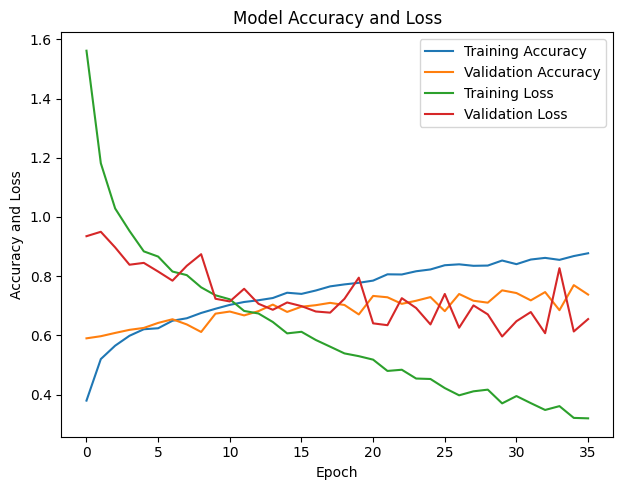

In [ ]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend()

plt.tight_layout()
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(95.72222222222221, 0.5, 'True Label')

Text(0.5, 58.7222222222222, 'Predicted Label')

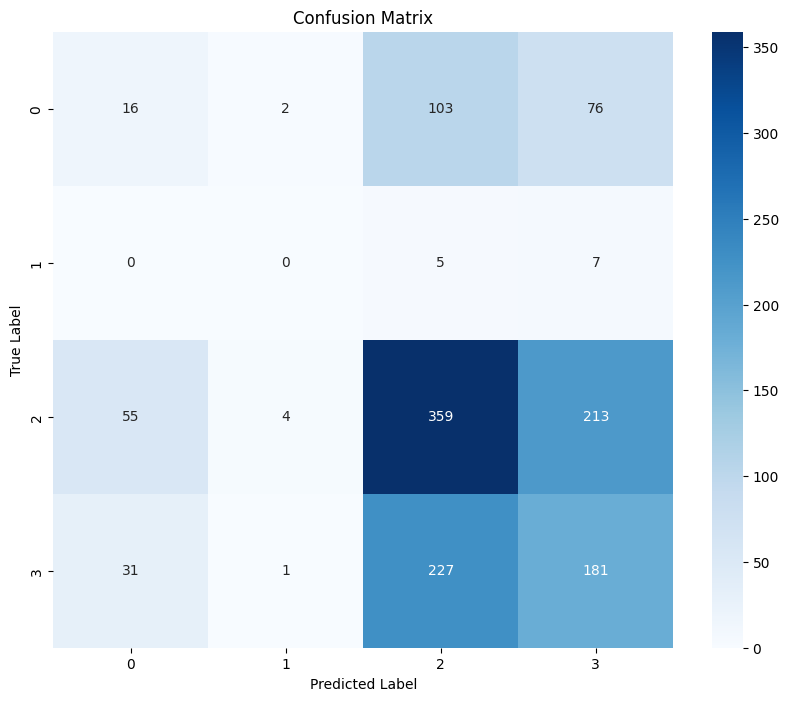

              precision    recall  f1-score   support

     Class 0       0.16      0.08      0.11       197
     Class 1       0.00      0.00      0.00        12
     Class 2       0.52      0.57      0.54       631
     Class 3       0.38      0.41      0.39       440

    accuracy                           0.43      1280
   macro avg       0.26      0.27      0.26      1280
weighted avg       0.41      0.43      0.42      1280



In [ ]:
# Get predictions
y_pred = best_model.predict(X_test_rgb)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
class_names = [f'Class {i}' for i in range(num_classes)]
print(classification_report(y_true, y_pred_classes, target_names=class_names))


##### Swish lr = 0.00001

In [ ]:
K.clear_session()

# Build model
model = build_inception_model()
print("Model created successfully")

# Callbacks
checkpoint = ModelCheckpoint(
        'inception_mri_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if val_loss does not improve for 5 consecutive epochs
    restore_best_weights=True  # Restore the best model weights after stopping
    )

# Train the model
history = model.fit(
        X_train_inc,
        y_train_inc,
        batch_size=32,
        epochs=25,
        validation_data=(X_val_inc, y_val_inc),
        callbacks=[checkpoint, early_stopping]
    )

# Load the best model before evaluation
best_model = load_model('inception_mri_model.keras')

# Evaluate the model
test_loss, test_acc = best_model.evaluate(X_test_rgb, y_test_one_hot)
print(f"Test accuracy: {test_acc}; Test loss: {test_loss}")

Model created successfully
Epoch 1/25
110/112 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2467 - loss: 1.6968
Epoch 1: val_accuracy improved from -inf to 0.35352, saving model to inception_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 50s 309ms/step - accuracy: 0.2474 - loss: 1.6957 - val_accuracy: 0.3535 - val_loss: 1.3943
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3184 - loss: 1.5529
Epoch 2: val_accuracy improved from 0.35352 to 0.44792, saving model to inception_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 30s 269ms/step - accuracy: 0.3185 - loss: 1.5527 - val_accuracy: 0.4479 - val_loss: 1.2700
Epoch 3/25
111/112 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3538 - loss: 1.4657
Epoch 3: val_accuracy improved from 0.44792 to 0.49284, saving model to inception_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 270ms/step - accuracy: 0.3541 - loss: 1.4656 - val_accuracy: 0.4928 - val_loss: 1.2042
Epoch 4/25
111/112 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accura

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Model Accuracy and Loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy and Loss')

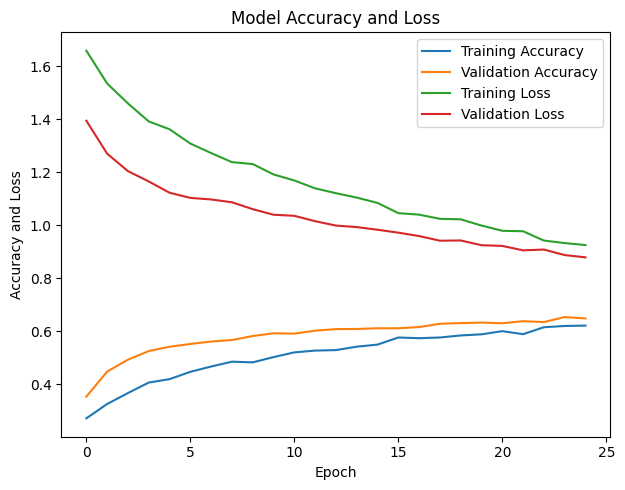

In [ ]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend()

plt.tight_layout()
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(95.72222222222221, 0.5, 'True Label')

Text(0.5, 58.7222222222222, 'Predicted Label')

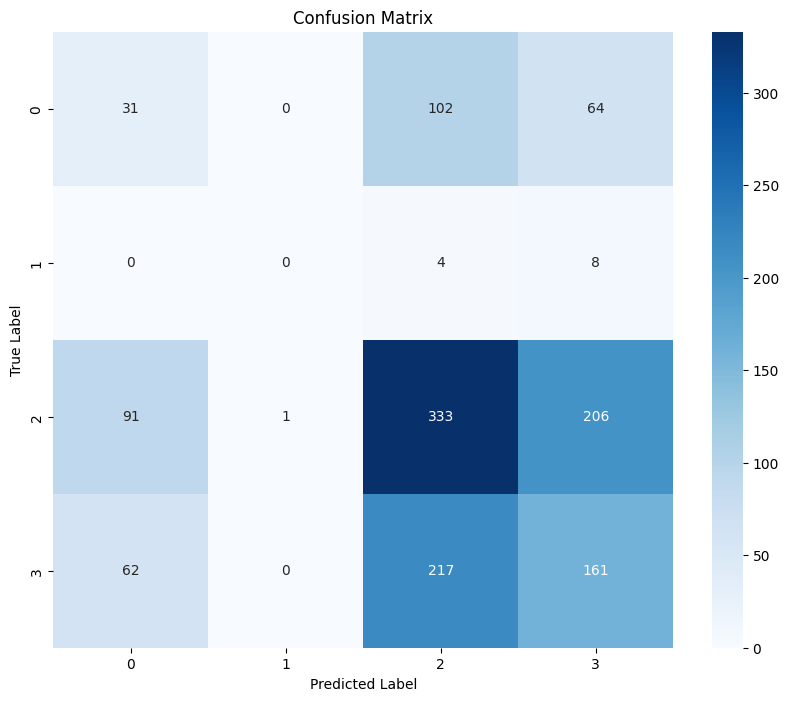

              precision    recall  f1-score   support

     Class 0       0.17      0.16      0.16       197
     Class 1       0.00      0.00      0.00        12
     Class 2       0.51      0.53      0.52       631
     Class 3       0.37      0.37      0.37       440

    accuracy                           0.41      1280
   macro avg       0.26      0.26      0.26      1280
weighted avg       0.40      0.41      0.41      1280



In [ ]:
# Get predictions
y_pred = best_model.predict(X_test_rgb)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
class_names = [f'Class {i}' for i in range(num_classes)]
print(classification_report(y_true, y_pred_classes, target_names=class_names))


### VGG16

In [ ]:
def build_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    # Freeze the base model layers
    base_model.trainable = False

        # Add custom layers for classification
    x = base_model.output
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(384)(x)
    x = BatchNormalization()(x)  # Normalize activations
    x = tf.keras.layers.Activation('swish')(x)
    x = Dropout(0.4)(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)  # Normalize activations
    x = tf.keras.layers.Activation('swish')(x)
    x = Dropout(0.4)(x)
    predictions = Dense(4, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

        # Compile the model
    model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

    return model

In [ ]:
K.clear_session()

# Build model
model = build_vgg16_model()
print("Model created successfully")

# Callbacks
checkpoint = ModelCheckpoint(
        'vgg16_mri_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if val_loss does not improve for 5 consecutive epochs
    restore_best_weights=True  # Restore the best model weights after stopping
    )

# Train the model
history = model.fit(
        X_train_inc,
        y_train_inc,
        batch_size=32,
        epochs=25,
        validation_data=(X_val_inc, y_val_inc),
        callbacks=[checkpoint, early_stopping]
    )

# Load the best model before evaluation
best_model = load_model('vgg16_mri_model.keras')

# Evaluate the model
test_loss, test_acc = best_model.evaluate(X_test_rgb, y_test_one_hot)
print(f"Test accuracy: {test_acc}; Test loss: {test_loss}")

Model created successfully
Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1616 - loss: 1.9974
Epoch 1: val_accuracy improved from -inf to 0.15234, saving model to vgg16_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.1616 - loss: 1.9972 - val_accuracy: 0.1523 - val_loss: 1.4820
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2071 - loss: 1.8621
Epoch 2: val_accuracy improved from 0.15234 to 0.19401, saving model to vgg16_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.2072 - loss: 1.8620 - val_accuracy: 0.1940 - val_loss: 1.4921
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2328 - loss: 1.7606
Epoch 3: val_accuracy improved from 0.19401 to 0.27539, saving model to vgg16_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.2328 - loss: 1.7606 - val_accuracy: 0.2754 - val_loss: 1.4468
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2682 - l

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Model Accuracy and Loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy and Loss')

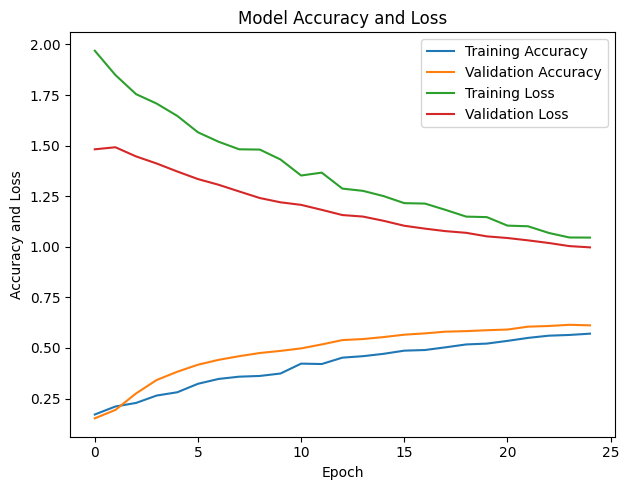

In [ ]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend()

plt.tight_layout()
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(95.72222222222221, 0.5, 'True Label')

Text(0.5, 58.7222222222222, 'Predicted Label')

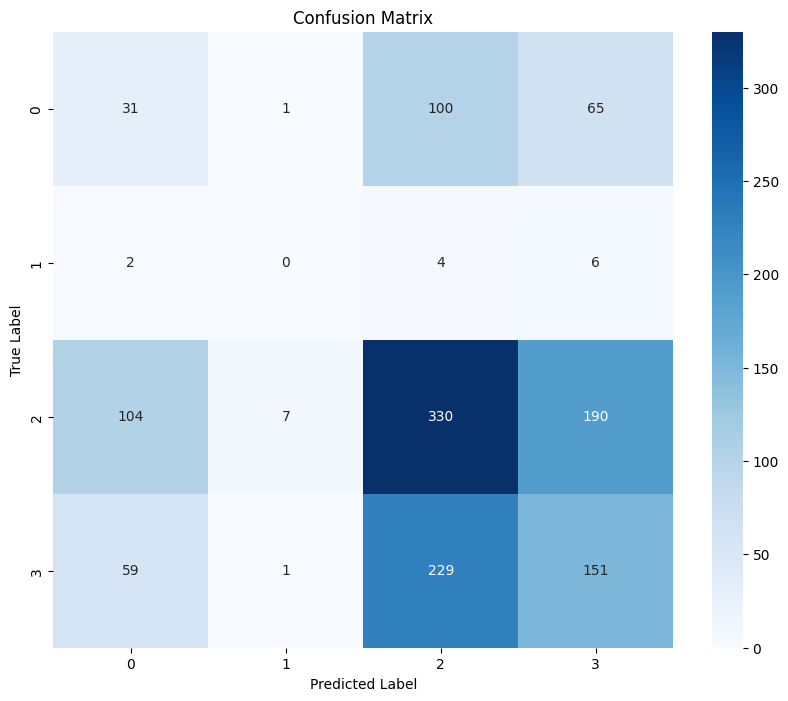

              precision    recall  f1-score   support

     Class 0       0.16      0.16      0.16       197
     Class 1       0.00      0.00      0.00        12
     Class 2       0.50      0.52      0.51       631
     Class 3       0.37      0.34      0.35       440

    accuracy                           0.40      1280
   macro avg       0.26      0.26      0.26      1280
weighted avg       0.40      0.40      0.40      1280



In [ ]:
# Get predictions
y_pred = best_model.predict(X_test_rgb)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
class_names = [f'Class {i}' for i in range(num_classes)]
print(classification_report(y_true, y_pred_classes, target_names=class_names))

### EfficientNet B1:

In [38]:
from tensorflow.keras.applications import EfficientNetB1


# Create a custom model based on InceptionV3
def build_efficientnet_model():
    # Set up input tensor for 128x128 images with 3 channels
    #input_tensor = Input(shape=(128, 128, 3))

    # Load InceptionV3 without the top layer and with pre-trained weights
    base_model = EfficientNetB1(
        weights='imagenet',
        include_top=False,
        input_shape=(128, 128, 3)
    )

    # Freeze the base model layers
    base_model.trainable = False

    # Add custom layers for classification
    x = base_model.output
    #x = MaxPooling2D((2, 2))(x)
    x = GlobalAveragePooling2D()(x)  # Efficient pooling instead of Flatten
    #x = Flatten()(x)
    x = Dense(512, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)  # Normalize activations
    x = tf.keras.layers.Activation('swish')(x)
    x = Dropout(0.4)(x)
    x = Dense(256, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)  # Normalize activations
    x = tf.keras.layers.Activation('swish')(x)
    x = Dropout(0.4)(x)
    predictions = Dense(4, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [22]:
K.clear_session()

# Build model
model = build_efficientnet_model()
print("Model created successfully")

# Callbacks
checkpoint = ModelCheckpoint(
        'effnet_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if val_loss does not improve for 5 consecutive epochs
    restore_best_weights=True  # Restore the best model weights after stopping
    )

# Train the model
history = model.fit(
        X_train_inc,
        y_train_inc,
        batch_size=32,
        epochs=25,
        validation_data=(X_val_inc, y_val_inc),
        callbacks=[checkpoint, early_stopping]
    )

# Load the best model before evaluation
best_model = load_model('effnet_model.keras')

# Evaluate the model
test_loss, test_acc = best_model.evaluate(X_test_rgb, y_test_one_hot)
print(f"Test accuracy: {test_acc}; Test loss: {test_loss}")

27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model created successfully
Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2335 - loss: 1.7894
Epoch 1: val_accuracy improved from -inf to 0.21224, saving model to effnet_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 60s 173ms/step - accuracy: 0.2336 - loss: 1.7891 - val_accuracy: 0.2122 - val_loss: 1.4257
Epoch 2/25
111/112 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2561 - loss: 1.7008
Epoch 2: val_accuracy improved from 0.21224 to 0.34570, saving model to effnet_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.2561 - loss: 1.7004 - val_accuracy: 0.3457 - val_loss: 1.4190
Epoch 3/25
111/112 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2787 - loss: 1.6016
Epoch 3: val_accuracy improved from 0.34570 to 0.36328, saving model to effnet_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2789 - loss: 1.6013 - val_accuracy: 0.3633 - val_loss: 1.4052
Epoch 4/25
111/112 ━━━━━━━━━━━━━━━━

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Model Accuracy and Loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy and Loss')

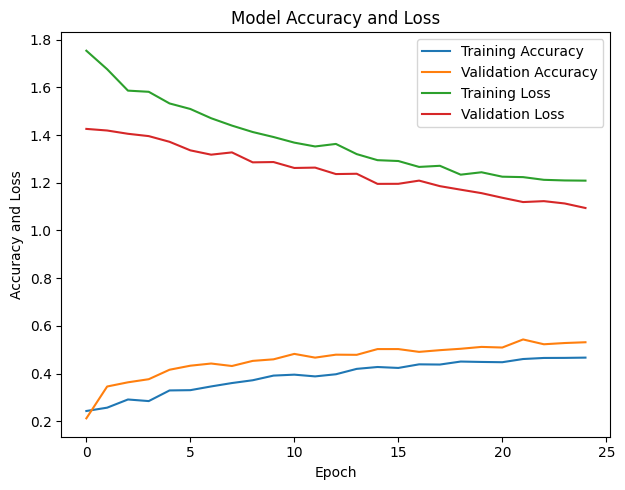

In [23]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend()

plt.tight_layout()
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(95.72222222222221, 0.5, 'True Label')

Text(0.5, 58.7222222222222, 'Predicted Label')

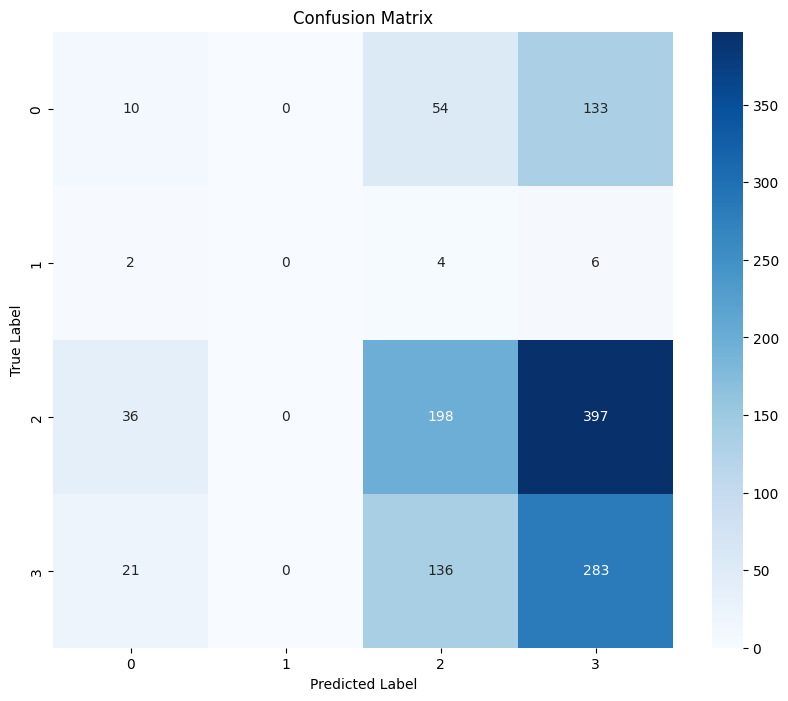

              precision    recall  f1-score   support

     Class 0       0.14      0.05      0.08       197
     Class 1       0.00      0.00      0.00        12
     Class 2       0.51      0.31      0.39       631
     Class 3       0.35      0.64      0.45       440

    accuracy                           0.38      1280
   macro avg       0.25      0.25      0.23      1280
weighted avg       0.39      0.38      0.36      1280



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Get predictions
y_pred = best_model.predict(X_test_rgb)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
class_names = [f'Class {i}' for i in range(num_classes)]
print(classification_report(y_true, y_pred_classes, target_names=class_names))


<br /><br/>
# <b><center><font color="navy">Experiment 2b: <br />Impact of Data Augmentation on Alzheimer's Stage Classification Using Transfer Learning
<br /><br />

#### InceptionV3

In [25]:
datagen = ImageDataGenerator(
    #preprocessing_function=adjust_brightness_and_contrast,  # Apply custom brightness and contrast adjustment
    width_shift_range=0.1,  # Shift width by 20%
    height_shift_range=0.1, # Shift height by 20%
    zoom_range=0.1,         # Zoom in/out
    fill_mode='nearest'     # Filling strategy for empty pixels
)

In [26]:
# Augment images
augmented_images = []
for img_array in train_data['img_arr'].values:
    img_array = np.expand_dims(img_array, axis=-1)  # Ensure shape is (128, 128, 1)

    # Convert grayscale (1 channel) to RGB (3 channels)
    img_array_rgb = np.concatenate([img_array] * 3, axis=-1)  # Shape: (128, 128, 3)

    img_array_rgb = np.expand_dims(img_array_rgb, axis=0)  # Add batch dimension (1, 128, 128, 3)
    augmented_img = next(datagen.flow(img_array_rgb, batch_size=1))[0]  # Apply augmentation
    augmented_images.append(augmented_img)

# Stack images into a 4D NumPy array (num_samples, 128, 128, 3)
X_train_augmented = np.stack(augmented_images)

# Normalize images to range [0,1]
X_train_augmented = X_train_augmented.astype('float32') / 255.0


In [ ]:
# Create a custom model based on InceptionV3
def build_inception_model():
    # Set up input tensor for 128x128 images with 3 channels
    #input_tensor = Input(shape=(128, 128, 3))

    # Load InceptionV3 without the top layer and with pre-trained weights
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(128, 128, 3)
    )

    # Freeze the base model layers
    base_model.trainable = False

    # Add custom layers for classification
    x = base_model.output
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(384)(x)
    x = BatchNormalization()(x)  # Normalize activations
    x = tf.keras.layers.Activation('swish')(x)
    x = Dropout(0.4)(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)  # Normalize activations
    x = tf.keras.layers.Activation('swish')(x)
    x = Dropout(0.4)(x)
    predictions = Dense(4, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [27]:
# Split training data into training and validation sets (70% train, 30% val)
X_train_inc, X_val_inc, y_train_inc, y_val_inc = train_test_split(X_train_augmented, y_train_one_hot, test_size=0.3, random_state=42, stratify=y_train_encoded)


In [ ]:
K.clear_session()

# Build model
model = build_inception_model()
print("Model created successfully")

# Callbacks
checkpoint = ModelCheckpoint(
        'inception_aug_mri_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if val_loss does not improve for 5 consecutive epochs
    restore_best_weights=True  # Restore the best model weights after stopping
    )

# Train the model
history = model.fit(
        X_train_inc,
        y_train_inc,
        batch_size=32,
        epochs=25,
        validation_data=(X_val_inc, y_val_inc),
        callbacks=[checkpoint, early_stopping]
    )

# Load the best model before evaluation
best_model = load_model('inception_aug_mri_model.keras')

# Evaluate the model
test_loss, test_acc = best_model.evaluate(X_test_rgb, y_test_one_hot)
print(f"Test accuracy: {test_acc}; Test loss: {test_loss}")

Model created successfully
Epoch 1/25
110/112 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2682 - loss: 1.6909
Epoch 1: val_accuracy improved from -inf to 0.40625, saving model to inception_aug_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.2686 - loss: 1.6901 - val_accuracy: 0.4062 - val_loss: 1.3258
Epoch 2/25
110/112 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3142 - loss: 1.5923
Epoch 2: val_accuracy did not improve from 0.40625
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3146 - loss: 1.5920 - val_accuracy: 0.3835 - val_loss: 1.3394
Epoch 3/25
110/112 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3472 - loss: 1.5295
Epoch 3: val_accuracy did not improve from 0.40625
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3474 - loss: 1.5292 - val_accuracy: 0.4056 - val_loss: 1.3136
Epoch 4/25
110/112 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3741 - loss: 1.4694
Epoch 4: val_accuracy improved from 0.40625 to 0.44010, saving model

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Model Accuracy and Loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy and Loss')

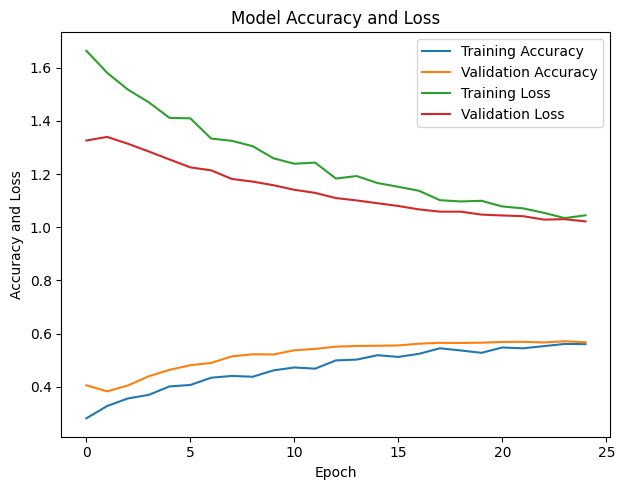

In [ ]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend()

plt.tight_layout()
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(95.72222222222221, 0.5, 'True Label')

Text(0.5, 58.7222222222222, 'Predicted Label')

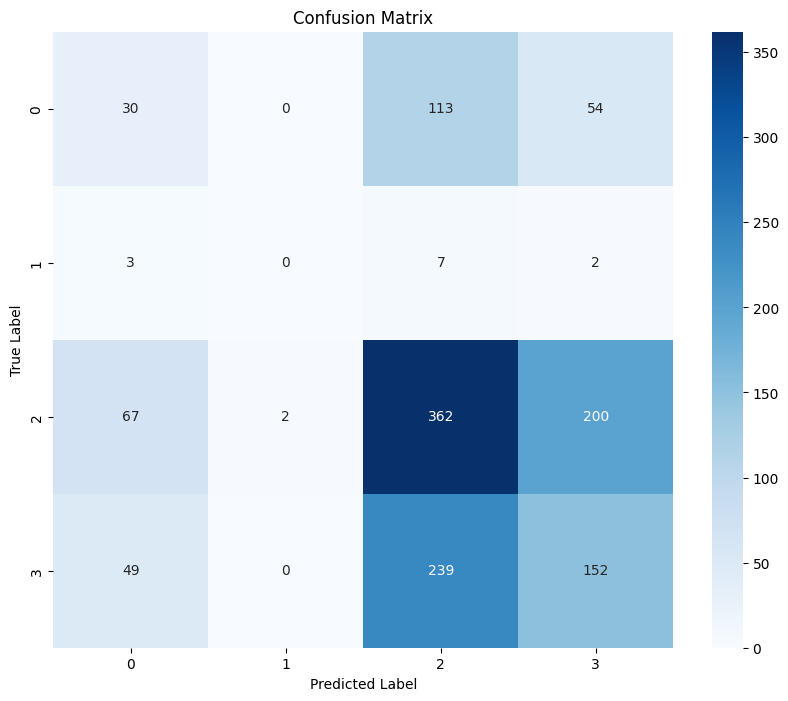

              precision    recall  f1-score   support

     Class 0       0.20      0.15      0.17       197
     Class 1       0.00      0.00      0.00        12
     Class 2       0.50      0.57      0.54       631
     Class 3       0.37      0.35      0.36       440

    accuracy                           0.42      1280
   macro avg       0.27      0.27      0.27      1280
weighted avg       0.41      0.42      0.41      1280



In [ ]:
# Get predictions
y_pred = best_model.predict(X_test_rgb)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
class_names = [f'Class {i}' for i in range(num_classes)]
print(classification_report(y_true, y_pred_classes, target_names=class_names))


### VGG16

In [ ]:
K.clear_session()

# Build model
model = build_vgg16_model()
print("Model created successfully")

# Callbacks
checkpoint = ModelCheckpoint(
        'vgg16_mri_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if val_loss does not improve for 5 consecutive epochs
    restore_best_weights=True  # Restore the best model weights after stopping
    )

# Train the model
history = model.fit(
        X_train_inc,
        y_train_inc,
        batch_size=32,
        epochs=25,
        validation_data=(X_val_inc, y_val_inc),
        callbacks=[checkpoint, early_stopping]
    )

# Load the best model before evaluation
best_model = load_model('vgg16_mri_model.keras')

# Evaluate the model
test_loss, test_acc = best_model.evaluate(X_test_rgb, y_test_one_hot)
print(f"Test accuracy: {test_acc}; Test loss: {test_loss}")

Model created successfully
Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2860 - loss: 1.6359
Epoch 1: val_accuracy improved from -inf to 0.30404, saving model to vgg16_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.2860 - loss: 1.6358 - val_accuracy: 0.3040 - val_loss: 1.3606
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3030 - loss: 1.5479
Epoch 2: val_accuracy improved from 0.30404 to 0.33724, saving model to vgg16_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.3031 - loss: 1.5479 - val_accuracy: 0.3372 - val_loss: 1.3555
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3450 - loss: 1.4928
Epoch 3: val_accuracy improved from 0.33724 to 0.38607, saving model to vgg16_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.3450 - loss: 1.4928 - val_accuracy: 0.3861 - val_loss: 1.3328
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3625 - lo

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Model Accuracy and Loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy and Loss')

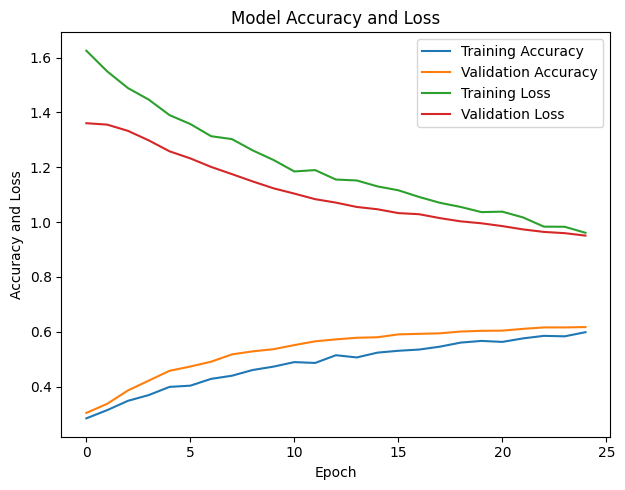

In [ ]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend()

plt.tight_layout()
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(95.72222222222221, 0.5, 'True Label')

Text(0.5, 58.7222222222222, 'Predicted Label')

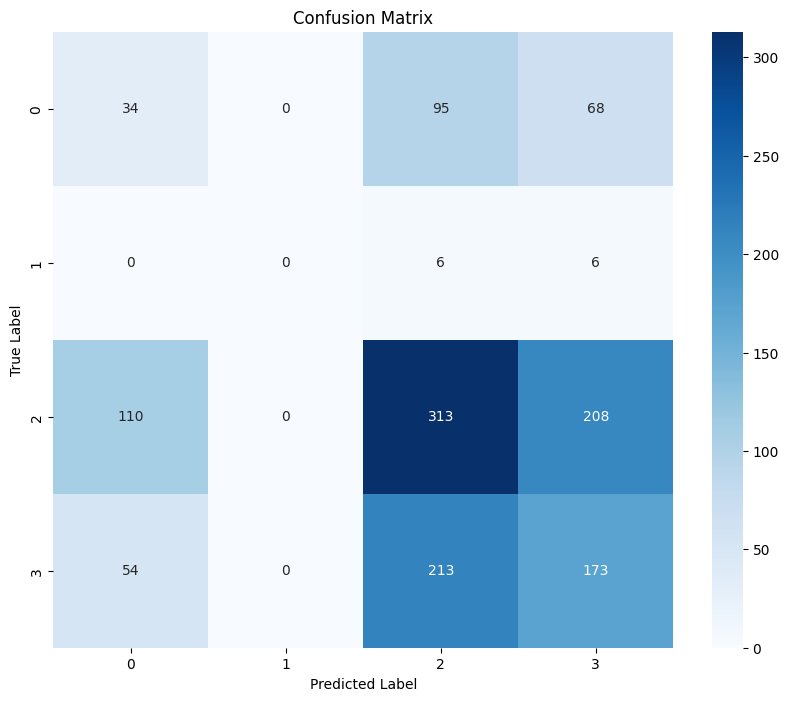

              precision    recall  f1-score   support

     Class 0       0.17      0.17      0.17       197
     Class 1       0.00      0.00      0.00        12
     Class 2       0.50      0.50      0.50       631
     Class 3       0.38      0.39      0.39       440

    accuracy                           0.41      1280
   macro avg       0.26      0.27      0.26      1280
weighted avg       0.40      0.41      0.40      1280



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Get predictions
y_pred = best_model.predict(X_test_rgb)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
class_names = [f'Class {i}' for i in range(num_classes)]
print(classification_report(y_true, y_pred_classes, target_names=class_names))


### EffecientNet B1

In [39]:
K.clear_session()

# Build model
model = build_efficientnet_model()
print("Model created successfully")

# Callbacks
checkpoint = ModelCheckpoint(
        'vgg16_mri_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if val_loss does not improve for 5 consecutive epochs
    restore_best_weights=True  # Restore the best model weights after stopping
    )

# Train the model
history = model.fit(
        X_train_inc,
        y_train_inc,
        batch_size=32,
        epochs=25,
        validation_data=(X_val_inc, y_val_inc),
        callbacks=[checkpoint, early_stopping]
    )

# Load the best model before evaluation
best_model = load_model('vgg16_mri_model.keras')

# Evaluate the model
test_loss, test_acc = best_model.evaluate(X_test_rgb, y_test_one_hot)
print(f"Test accuracy: {test_acc}; Test loss: {test_loss}")

Model created successfully
Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4357 - loss: 1.3763
Epoch 1: val_accuracy improved from -inf to 0.50130, saving model to vgg16_mri_model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 47s 132ms/step - accuracy: 0.4357 - loss: 1.3755 - val_accuracy: 0.5013 - val_loss: 1.0985
Epoch 2/25
111/112 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4560 - loss: 1.1741
Epoch 2: val_accuracy did not improve from 0.50130
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.4559 - loss: 1.1737 - val_accuracy: 0.5013 - val_loss: 1.0372
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4607 - loss: 1.1070
Epoch 3: val_accuracy did not improve from 0.50130
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.4608 - loss: 1.1070 - val_accuracy: 0.5013 - val_loss: 1.0351
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4577 - loss: 1.0959
Epoch 4: val_accuracy did not improve from 0.50130
112/112 ━━━━━━━━━━━━━━━━

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Model Accuracy and Loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy and Loss')

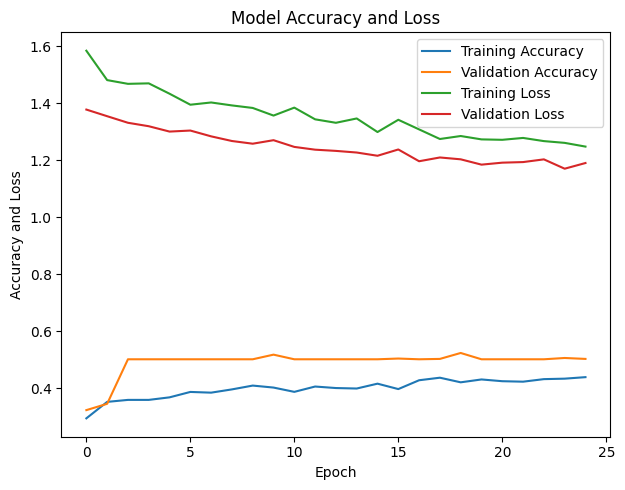

In [36]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.legend()

plt.tight_layout()
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(95.72222222222221, 0.5, 'True Label')

Text(0.5, 58.7222222222222, 'Predicted Label')

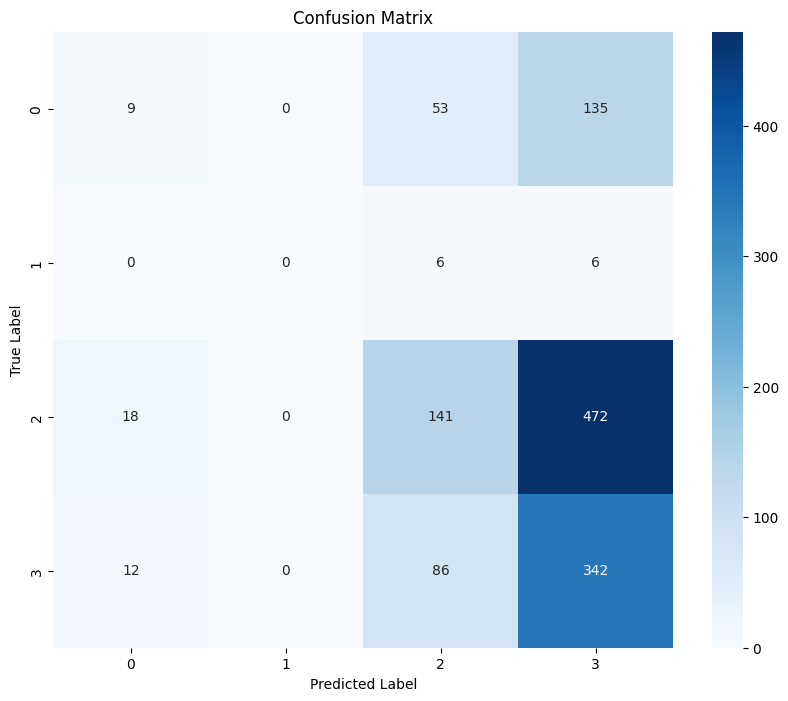

              precision    recall  f1-score   support

     Class 0       0.23      0.05      0.08       197
     Class 1       0.00      0.00      0.00        12
     Class 2       0.49      0.22      0.31       631
     Class 3       0.36      0.78      0.49       440

    accuracy                           0.38      1280
   macro avg       0.27      0.26      0.22      1280
weighted avg       0.40      0.38      0.33      1280



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
# Get predictions
y_pred = best_model.predict(X_test_rgb)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
class_names = [f'Class {i}' for i in range(num_classes)]
print(classification_report(y_true, y_pred_classes, target_names=class_names))
